### Name: Yar Hui Ling Angela | 6935683A
-------------------------------------------------------------------------------
## Background and Business Goal
Since its inception in 1969 in Paris, Sephora has expanded globally and revolutionized beauty retailing with a focus on luxury and expertise. It offers a wide selection of skincare products and solutions, ranging from makeup, skincare, hair care and beauty tools.  

Its dedication to empowering customers through personalized service and expert advice is central to Sephora's success. Ongoing competition and market saturation challenges mean Sephora must constantly distinguish itself from other competitors through its unique brand identity and offering. Through innovations with digital tools and enhanced personalized recommendations based on customer preferences, it remains dedicated to its mission to elevate the beauty retail experience and lead in the industry. 
This project aims to gather valuable insights into customer satisfaction and sentiment by analysing helpful reviews and features. These include identifying best-selling items, product effectiveness through reviews and ratings, and a recommendation system for cross-selling to increase sales and customer 
satisfaction. 

-------------------------------------------------------------------------------

### About the Dataset
- The dataset was collected from Kaggle.com [Sephora Products and Skincare Reviews](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews). 
- It contains information about over 8,000 beauty products from Sephora Online store. Including product, brand names, prices, ingredients, ratings and all other features. 
- More than a million user reviews on over 2,000 products on all products from the skincare category, including user appearances, and review ratings by other users.
-------------------------------------------------------------------------------

### Business Objective:
To enhance product recommendations on acne products based on customer reviews and attributes to drive personalized content recommendations. Thus, driving the increase in sales and customer satisfaction. 

-------------------------------------------------------------------------------

### Success Criteria:
To achieve 25% increase in conversion rates for recommended products.

-------------------------------------------------------------------------------

### Data Mining Goal:
Implementing user profiling in a collaborative filtering recommendation system to enhance cross-selling opportunities based on customer interaction and item features. 

-------------------------------------------------------------------------------

### Hypothesis:
Customers are more likely to purchase products recommended based on product ratings and positive sentiment.

-------------------------------------------------------------------------------

### Target Variables:
- Average Review Ratings
- Positive Sentiment Analysis 

-------------------------------------------------------------------------------

### Modelling:
Multinomial Logistic Regression, Random Forest & Naive Bayes

-------------------------------------------------------------------------------
### Step 1: Import the relevant libraries and packages

In [1]:
!pip install wordcloud

In [2]:
# Let's import all the relevant libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from wordcloud import WordCloud
from sklearn.utils import resample
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, randint


### Step 2: Load the datasets

In [3]:
# Load all the datasets.
products = pd.read_csv('sephora product_info.csv')
review1 = pd.read_csv('sephora reviews_0-250.csv')
review2 = pd.read_csv('sephora reviews_250-500.csv')
review3 = pd.read_csv('sephora reviews_500-750.csv')
# review4 = pd.read_csv('sephora reviews_750-1250.csv')   # Exclude this worksheet for unseen data.
review5 = pd.read_csv('sephora reviews_1250-end.csv')

C:\Users\angel\AppData\Local\Temp\ipykernel_3424\3266890517.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review1 = pd.read_csv('sephora reviews_0-250.csv')
C:\Users\angel\AppData\Local\Temp\ipykernel_3424\3266890517.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review5 = pd.read_csv('sephora reviews_1250-end.csv')


### Step 3: Data Exploration
Data exploration is the initial phase of data analysis where we examine and summarize the main characteristics of a dataset, often using visual and quantitative methods. Its primary goal is to understand the data, discover patterns, spot anomalies, and check assumptions.

In [4]:
# Preview of the first 5 rows of the Product dataset.
products.head()

product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   
3    P473660       Kasbah Eau de Parfum      6342      19-69         3018   
4    P473658  Purple Haze Eau de Parfum      6342      19-69         2691   

   rating  reviews            size                      variation_type  \
0  3.6364     11.0             NaN                                 NaN   
1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
3  4.4762     21.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
4  3.2308     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value  ... online_only out_of_stock  sephora_exclusive  \
0             NaN  ...           1            0                  0   
1  3.4 oz/ 100 mL  ...           1            0                  0   
2  3.4 oz/ 100 mL  ...           1            0                  0   
3  3.4 oz/ 100 mL  ...           1            0                  0   
4  3.4 oz/ 100 mL  ...           1            0                  0   

                                          highlights  primary_category  \
0  ['Unisex/ Genderless Scent', 'Warm &Spicy Scen...         Fragrance   
1  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
2  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
3  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
4  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   

   secondary_category  tertiary_category  child_count  child_max_price  \
0   Value & Gift Sets  Perfume Gift Sets            0              NaN   
1               Women            Perfume            2             85.0   
2               Women            Perfume            2             75.0   
3               Women            Perfume            2             75.0   
4               Women            Perfume            2             75.0   

   child_min_price  
0              NaN  
1             30.0  
2             30.0  
3             30.0  
4             30.0  

[5 rows x 27 columns]

In [5]:
# Let's combine the 5 review files into one dataframe.
# We will call this combined dataframe as 'combined_reviews'
combined_reviews = pd.concat([review1, review2, review3, review5], axis=0)

# Resetting index (optional)
combined_reviews.reset_index(drop=True, inplace=True)

# Display the combined dataframe
combined_reviews.head()

Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0           0   1741593524       5             1.0          1.0   
1           1  31423088263       1             0.0          NaN   
2           2   5061282401       5             1.0          NaN   
3           3   6083038851       5             1.0          NaN   
4           4  47056667835       5             1.0          NaN   

   total_feedback_count  total_neg_feedback_count  total_pos_feedback_count  \
0                     2                         0                         2   
1                     0                         0                         0   
2                     0                         0                         0   
3                     0                         0                         0   
4                     0                         0                         0   

  submission_time                                        review_text  \
0      2023-02-01  I use this with the Nudestix “Citrus Clean Bal...   
1      2023-03-21  I bought this lip mask after reading the revie...   
2      2023-03-21  My review title says it all! I get so excited ...   
3      2023-03-20  I’ve always loved this formula for a long time...   
4      2023-03-20  If you have dry cracked lips, this is a must h...   

                       review_title skin_tone eye_color    skin_type  \
0  Taught me how to double cleanse!       NaN     brown          dry   
1                      Disappointed       NaN       NaN          NaN   
2              New Favorite Routine     light     brown          dry   
3   Can't go wrong with any of them       NaN     brown  combination   
4                   A must have !!!     light     hazel  combination   

  hair_color product_id                                       product_name  \
0      black    P504322                     Gentle Hydra-Gel Face Cleanser   
1        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
2     blonde    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
3      black    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
4        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   

  brand_name  price_usd  
0   NUDESTIX       19.0  
1    LANEIGE       24.0  
2    LANEIGE       24.0  
3    LANEIGE       24.0  
4    LANEIGE       24.0

In [6]:
# Check features and data type
print("Product Info:")
products.info()

print()
print()

print("Reviews Info:")
combined_reviews.info()

Product Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64

### Retrieve the dimensions of the Product and Reviews Dataframe

In [7]:
# Retrieve the dimensions of the PRODUCT daatframe.
print("Product Dataset:")
print ("Rows     : " ,products.shape[0])
print ("Columns  : " ,products.shape[1])

# Retrieve the features of the data.
print ("\nFeatures : \n" ,products.columns.tolist())

print ("\nUnique values :  \n", products.nunique())

Product Dataset:
Rows     :  8494
Columns  :  27

Features : 
 ['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count', 'rating', 'reviews', 'size', 'variation_type', 'variation_value', 'variation_desc', 'ingredients', 'price_usd', 'value_price_usd', 'sale_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category', 'secondary_category', 'tertiary_category', 'child_count', 'child_max_price', 'child_min_price']

Unique values :  
 product_id            8494
product_name          8415
brand_id               304
brand_name             304
loves_count           7436
rating                4394
reviews               1556
size                  2055
variation_type           7
variation_value       2729
variation_desc         935
ingredients           6538
price_usd              298
value_price_usd        174
sale_price_usd          88
limited_edition          2
new                      2
online_only              2
ou

In [8]:
# Retrieve the dimensions of the REVIEWS dataframe.
print("Combined Reviews Dataset:")
print ("Rows     : " ,combined_reviews.shape[0])
print ("Columns  : " ,combined_reviews.shape[1])

# Retrieve the features of the data.
print ("\nFeatures : \n" ,combined_reviews.columns.tolist())

print ("\nUnique values :  \n", combined_reviews.nunique())

Combined Reviews Dataset:
Rows     :  975094
Columns  :  19

Features : 
 ['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time', 'review_text', 'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id', 'product_name', 'brand_name', 'price_usd']

Unique values :  
 Unnamed: 0                  602130
author_id                   533291
rating                           5
is_recommended                   2
helpfulness                   3465
total_feedback_count           665
total_neg_feedback_count       244
total_pos_feedback_count       586
submission_time               5317
review_text                 853891
review_title                324686
skin_tone                       14
eye_color                        6
skin_type                        4
hair_color                       7
product_id                    1852
product_name                  1838


### Explore the Descriptive Statistics

In [9]:
# Products' Descriptive Statistics
products.describe()

brand_id   loves_count       rating       reviews    price_usd  \
count  8494.000000  8.494000e+03  8216.000000   8216.000000  8494.000000   
mean   5422.440546  2.917957e+04     4.194513    448.545521    51.655595   
std    1709.595957  6.609212e+04     0.516694   1101.982529    53.669234   
min    1063.000000  0.000000e+00     1.000000      1.000000     3.000000   
25%    5333.000000  3.758000e+03     3.981725     26.000000    25.000000   
50%    6157.500000  9.880000e+03     4.289350    122.000000    35.000000   
75%    6328.000000  2.684125e+04     4.530525    418.000000    58.000000   
max    8020.000000  1.401068e+06     5.000000  21281.000000  1900.000000   

       value_price_usd  sale_price_usd  limited_edition          new  \
count       451.000000      270.000000      8494.000000  8494.000000   
mean         91.168537       20.207889         0.070285     0.071698   
std          79.195631       24.327352         0.255642     0.258002   
min           0.000000        1.750000         0.000000     0.000000   
25%          45.000000        8.000000         0.000000     0.000000   
50%          67.000000       14.000000         0.000000     0.000000   
75%         108.500000       25.000000         0.000000     0.000000   
max         617.000000      320.000000         1.000000     1.000000   

       online_only  out_of_stock  sephora_exclusive  child_count  \
count  8494.000000   8494.000000        8494.000000  8494.000000   
mean      0.219096      0.073699           0.279374     1.631622   
std       0.413658      0.261296           0.448718     5.379470   
min       0.000000      0.000000           0.000000     0.000000   
25%       0.000000      0.000000           0.000000     0.000000   
50%       0.000000      0.000000           0.000000     0.000000   
75%       0.000000      0.000000           1.000000     1.000000   
max       1.000000      1.000000           1.000000   105.000000   

       child_max_price  child_min_price  
count      2754.000000      2754.000000  
mean         53.792023        39.665802  
std          58.765894        38.685720  
min           3.000000         3.000000  
25%          22.000000        19.000000  
50%          32.000000        28.000000  
75%          59.000000        42.000000  
max         570.000000       400.000000

The dataset encompasses 8,494 products, showcasing a diverse range of attributes. On average, each product has about 5,422 loves and is priced at approximately $52. 

The average rating stands at 4.19 out of 5. A mean price of $ 51.66, and the maximum of $1,900 indicate a significant variation in prices and broad spectrum of product values. 

Additionally, about 22% of the products are out of stock, reflecting a notable availability issue.

In [10]:
# Reviews' Descriptive Statistics
combined_reviews.describe()

Unnamed: 0         rating  is_recommended    helpfulness  \
count  975094.000000  975094.000000   816002.000000  465509.000000   
mean   216035.244091       4.293174        0.837453       0.768883   
std    177642.110065       1.153519        0.368952       0.316727   
min         0.000000       1.000000        0.000000       0.000000   
25%     64598.250000       4.000000        1.000000       0.666667   
50%    160653.500000       5.000000        1.000000       0.931818   
75%    358355.750000       5.000000        1.000000       1.000000   
max    602129.000000       5.000000        1.000000       1.000000   

       total_feedback_count  total_neg_feedback_count  \
count         975094.000000             975094.000000   
mean               4.088308                  0.867469   
std               23.450630                  5.200292   
min                0.000000                  0.000000   
25%                0.000000                  0.000000   
50%                0.000000                  0.000000   
75%                3.000000                  1.000000   
max             5464.000000               1159.000000   

       total_pos_feedback_count      price_usd  
count             975094.000000  975094.000000  
mean                   3.220839      48.433532  
std                   20.400552      39.607575  
min                    0.000000       3.000000  
25%                    0.000000      24.000000  
50%                    0.000000      39.000000  
75%                    2.000000      62.000000  
max                 5050.000000    1900.000000

The dataset features over 1.09 million entries related to product feedback. The average rating is 4.30 out of 5, and approximately 84% of reviews are marked as recommended. Key highlights include a substantial range in feedback count, with the maximum number of total feedbacks reaching 5,464, while the average feedback count is around 4.18. Additionally, the mean price of the products is about $49.01, indicating a diverse pricing spectrum.

### Finding the Correlation among the variables

In [11]:
# Find correlation among numerical variables in Products dataset.

# Select numerical columns
numerical_products = products.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_products = numerical_products.corr()

# Apply conditional formatting to highlight correlations >= 0.7 or <= -0.7
highlighted_correlation = correlation_products.style.applymap(
    lambda x: 'background-color: yellow' if x >= 0.6 or x <= -0.6 else ''
)

# Display the highlighted correlation matrix
highlighted_correlation


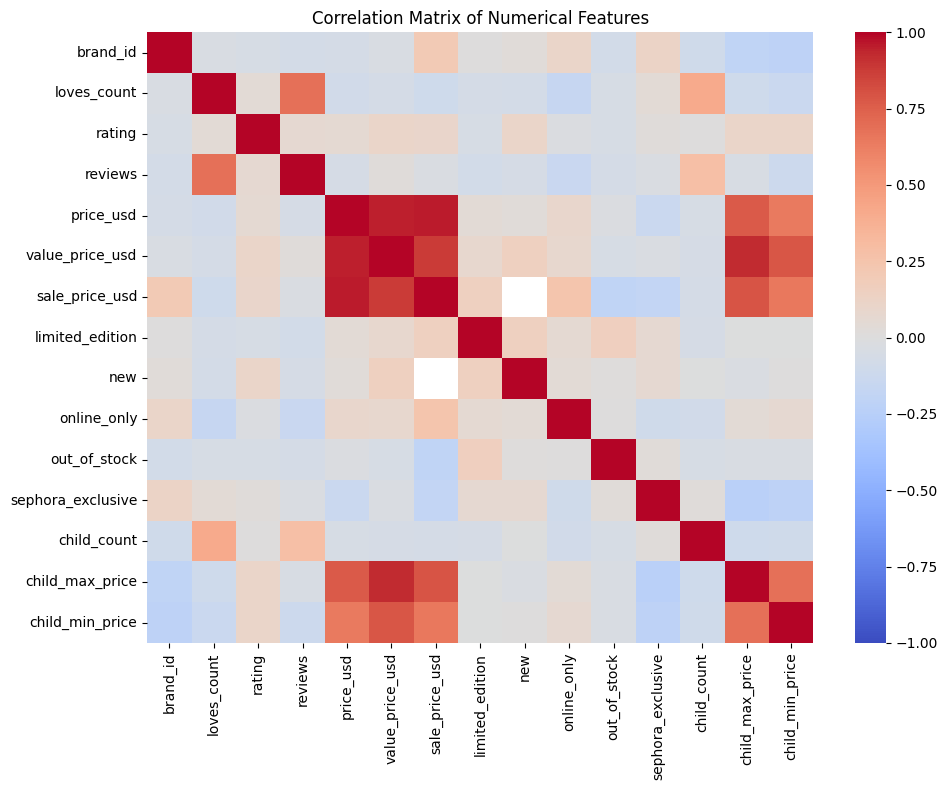

In [12]:
# Create a figure and axis
plt.figure(figsize=(10, 8))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_products, annot=False,cmap='coolwarm', vmin=-1, vmax=1)

# Customize labels, title, and color bar
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

The correlation analysis reveals several key relationships between product attributes. Firstly, there is a strong positive correlation between price_usd, value_price_usd, and sale_price_usd (all above 0.95), indicating that higher prices tend to align closely with higher value and sale prices. 

Secondly, loves_count has a moderate positive correlation with reviews (0.68), suggesting that products with more reviews generally receive more "loves" or positive feedback. 

Additionally, child_max_price and child_min_price show a moderate positive correlation (0.68), reflecting that products with higher maximum child prices also tend to have higher minimum prices for children’s items.

Notably, new and sales_price_usd shows no correlation as indicate with the "nan" or the white shading due to insufficient or no data for computation. 

Note:
- child_max_price: The highest price among the variations of the product.
- child_min_price: The lowest price amoing the variations of the product.

In [13]:
# Find correlation among numerical variables in Reviews dataset
numerical_reviews = combined_reviews.select_dtypes(include='number')
correlation_reviews = numerical_reviews.corr()
correlation_reviews

Unnamed: 0    rating  is_recommended  helpfulness  \
Unnamed: 0                  1.000000  0.000380        0.002962    -0.019124   
rating                      0.000380  1.000000        0.845430     0.187884   
is_recommended              0.002962  0.845430        1.000000     0.141598   
helpfulness                -0.019124  0.187884        0.141598     1.000000   
total_feedback_count       -0.009160 -0.083420       -0.082832     0.015341   
total_neg_feedback_count   -0.011175 -0.174122       -0.158602    -0.203265   
total_pos_feedback_count   -0.007680 -0.051507       -0.054218     0.069310   
price_usd                   0.000807  0.002492        0.016813    -0.049459   

                          total_feedback_count  total_neg_feedback_count  \
Unnamed: 0                           -0.009160                 -0.011175   
rating                               -0.083420                 -0.174122   
is_recommended                       -0.082832                 -0.158602   
helpfulness                           0.015341                 -0.203265   
total_feedback_count                  1.000000                  0.659255   
total_neg_feedback_count              0.659255                  1.000000   
total_pos_feedback_count              0.981459                  0.502911   
price_usd                             0.022548                  0.023037   

                          total_pos_feedback_count  price_usd  
Unnamed: 0                               -0.007680   0.000807  
rating                                   -0.051507   0.002492  
is_recommended                           -0.054218   0.016813  
helpfulness                               0.069310  -0.049459  
total_feedback_count                      0.981459   0.022548  
total_neg_feedback_count                  0.502911   0.023037  
total_pos_feedback_count                  1.000000   0.020047  
price_usd                                 0.020047   1.000000

In [14]:
# Select numerical columns
numerical_reviews = combined_reviews.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_reviews = numerical_reviews.corr()

# Apply conditional formatting to highlight correlations >= 0.7 or <= -0.7
highlighted_correlation = correlation_reviews.style.applymap(
    lambda x: 'background-color: yellow' if x >= 0.6 or x <= -0.6 else ''
)

# Display the highlighted correlation matrix
highlighted_correlation

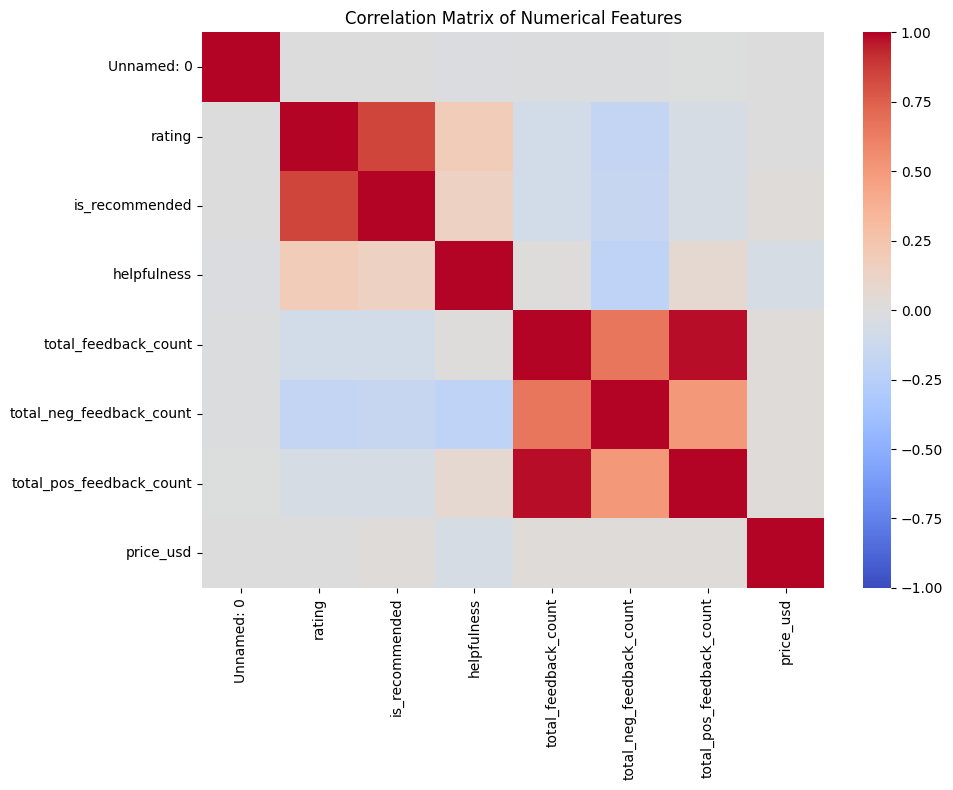

In [15]:
# Create a figure and axis
plt.figure(figsize=(10, 8))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_reviews, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Customize labels, title, and color bar
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

The correlation analysis highlights several important patterns in the Reviews dataset. Firstly, the rating has a strong positive correlation with is_recommended (0.85), indicating that higher-rated products are more likely to be recommended by users. 

Secondly, there is a very high correlation between total_feedback_count and total_pos_feedback_count (0.98), suggesting that products with more total feedback tend to receive a proportional amount of positive feedback. 

Lastly, the total_neg_feedback_count shows a moderate positive correlation with total_feedback_count (0.65), implying that as the overall number of feedback increases, the number of negative feedbacks also tends to rise.

### Step 4: Data Preparation
We have identified several columns with missing values across both the Products and Reviews dataframes. To streamline our analysis, we will first focus on feature selection or dimensionality reduction before addressing the missing values through imputation.

In [16]:
# Using the product dataset, let's find attributes with missing values
print("Number of missing rows in Product Dataframe")
products.isnull().sum()

Number of missing rows in Product Dataframe


product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [17]:
# Using the combined reviews dataset, let's find attributes with missing values
print("Number of missing rows in Reviews Dataframe")
combined_reviews.isnull().sum()

Number of missing rows in Reviews Dataframe


Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              159092
helpfulness                 509585
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1355
review_title                275098
skin_tone                   155291
eye_color                   194965
skin_type                   103952
hair_color                  206211
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [18]:
# In combined_reviews, we create a new column by merging review_title and review_text.
combined_reviews['merged_reviews'] = combined_reviews['review_title'] + ' - ' + combined_reviews['review_text']

# Preview the dataframe
combined_reviews.head()

Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0           0   1741593524       5             1.0          1.0   
1           1  31423088263       1             0.0          NaN   
2           2   5061282401       5             1.0          NaN   
3           3   6083038851       5             1.0          NaN   
4           4  47056667835       5             1.0          NaN   

   total_feedback_count  total_neg_feedback_count  total_pos_feedback_count  \
0                     2                         0                         2   
1                     0                         0                         0   
2                     0                         0                         0   
3                     0                         0                         0   
4                     0                         0                         0   

  submission_time                                        review_text  \
0      2023-02-01  I use this with the Nudestix “Citrus Clean Bal...   
1      2023-03-21  I bought this lip mask after reading the revie...   
2      2023-03-21  My review title says it all! I get so excited ...   
3      2023-03-20  I’ve always loved this formula for a long time...   
4      2023-03-20  If you have dry cracked lips, this is a must h...   

                       review_title skin_tone eye_color    skin_type  \
0  Taught me how to double cleanse!       NaN     brown          dry   
1                      Disappointed       NaN       NaN          NaN   
2              New Favorite Routine     light     brown          dry   
3   Can't go wrong with any of them       NaN     brown  combination   
4                   A must have !!!     light     hazel  combination   

  hair_color product_id                                       product_name  \
0      black    P504322                     Gentle Hydra-Gel Face Cleanser   
1        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
2     blonde    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
3      black    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
4        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   

  brand_name  price_usd                                     merged_reviews  
0   NUDESTIX       19.0  Taught me how to double cleanse! - I use this ...  
1    LANEIGE       24.0  Disappointed - I bought this lip mask after re...  
2    LANEIGE       24.0  New Favorite Routine - My review title says it...  
3    LANEIGE       24.0  Can't go wrong with any of them - I’ve always ...  
4    LANEIGE       24.0  A must have !!! - If you have dry cracked lips...

### Feature Selection
Based on our business objectives and the correlation analysis, we will retain key features that are most relevant to our analysis. Most of these selected features will be sourced from the combined_review dataframe, while the loves_count feature will be taken from the product dataframe.

- author_id: The unique identifier for the author of the review on the website.
- rating: The rating given by the author for the product on a scale of 1 to 5.
- is_recommended: Indicates if the author recommends the product or not (1-true, 0-false).
- helpfulness: The ratio of all ratings to positive ratings for the review: helpfulness = total_pos_feedback_count / total_feedback_count
- merged_reviews: Merging of the title and the review written by the author.
- Product Name: The full name of the product.
- Brand Name: The full name of the product brand. 
- Loves Count: The numer of people who have marked this product as a favourite.

In [19]:
# Retain essential columns for our analysis
products_df = products[['product_id', 'loves_count']]

reviews_df = combined_reviews[['author_id',
                               'rating',
                               'is_recommended',
                               'helpfulness',
                               'merged_reviews',
                               'product_id',
                               'product_name']]


In [20]:
# Previewing the products dataframe
products_df.head()

product_id  loves_count
0    P473671         6320
1    P473668         3827
2    P473662         3253
3    P473660         3018
4    P473658         2691

In [21]:
# Previewing the reviews dataframe
reviews_df.head()

author_id  rating  is_recommended  helpfulness  \
0   1741593524       5             1.0          1.0   
1  31423088263       1             0.0          NaN   
2   5061282401       5             1.0          NaN   
3   6083038851       5             1.0          NaN   
4  47056667835       5             1.0          NaN   

                                      merged_reviews product_id  \
0  Taught me how to double cleanse! - I use this ...    P504322   
1  Disappointed - I bought this lip mask after re...    P420652   
2  New Favorite Routine - My review title says it...    P420652   
3  Can't go wrong with any of them - I’ve always ...    P420652   
4  A must have !!! - If you have dry cracked lips...    P420652   

                                        product_name  
0                     Gentle Hydra-Gel Face Cleanser  
1  Lip Sleeping Mask Intense Hydration with Vitam...  
2  Lip Sleeping Mask Intense Hydration with Vitam...  
3  Lip Sleeping Mask Intense Hydration with Vitam...  
4  Lip Sleeping Mask Intense Hydration with Vitam...

In [22]:
# Merge the product and combined_reviews dataframe into one.
# Using product_id as the primary key.

product_reviews = pd.merge(reviews_df, products_df, on='product_id', how='inner')
product_reviews.head()

author_id  rating  is_recommended  helpfulness  \
0   1741593524       5             1.0          1.0   
1  31423088263       1             0.0          NaN   
2   5061282401       5             1.0          NaN   
3   6083038851       5             1.0          NaN   
4  47056667835       5             1.0          NaN   

                                      merged_reviews product_id  \
0  Taught me how to double cleanse! - I use this ...    P504322   
1  Disappointed - I bought this lip mask after re...    P420652   
2  New Favorite Routine - My review title says it...    P420652   
3  Can't go wrong with any of them - I’ve always ...    P420652   
4  A must have !!! - If you have dry cracked lips...    P420652   

                                        product_name  loves_count  
0                     Gentle Hydra-Gel Face Cleanser          177  
1  Lip Sleeping Mask Intense Hydration with Vitam...      1081315  
2  Lip Sleeping Mask Intense Hydration with Vitam...      1081315  
3  Lip Sleeping Mask Intense Hydration with Vitam...      1081315  
4  Lip Sleeping Mask Intense Hydration with Vitam...      1081315

In [23]:
# Let's review the shape of product_reviews
product_reviews.shape

(975094, 8)

In [24]:
# Using the product_reviews dataset, let's find where the missing values are located
print("Number of missing rows in Product Reviews Dataframe")
product_reviews.isnull().sum()

Number of missing rows in Product Reviews Dataframe


author_id              0
rating                 0
is_recommended    159092
helpfulness       509585
merged_reviews    275098
product_id             0
product_name           0
loves_count            0
dtype: int64

### Replace missing review text as "No Review Provided"

In [25]:
# It is not possible to impute text reviews. 
# Let's replace Missing review_title_text as "No Review Provided".

product_reviews['merged_reviews'] = product_reviews['merged_reviews'].fillna('No Reviews Provided')

# Display the updated DataFrame
print(product_reviews)

          author_id  rating  is_recommended  helpfulness  \
0        1741593524       5             1.0          1.0   
1       31423088263       1             0.0          NaN   
2        5061282401       5             1.0          NaN   
3        6083038851       5             1.0          NaN   
4       47056667835       5             1.0          NaN   
...             ...     ...             ...          ...   
975089   2276253200       5             1.0          NaN   
975090  28013163278       5             1.0          NaN   
975091   1539813076       5             1.0          NaN   
975092   5595682861       5             1.0          NaN   
975093  27666075558       5             1.0          NaN   

                                           merged_reviews product_id  \
0       Taught me how to double cleanse! - I use this ...    P504322   
1       Disappointed - I bought this lip mask after re...    P420652   
2       New Favorite Routine - My review title says it...    P4

In [26]:
# Calculate the mode of 'helpfulness' and 'is_recommended' for each 'rating'
mode_by_rating = product_reviews.groupby('rating').agg({
    'helpfulness': lambda x: x.mode()[0] if not x.mode().empty else None,
    'is_recommended': lambda x: x.mode()[0] if not x.mode().empty else None
})

# Map these mode values to the 'rating' column in the original DataFrame
product_reviews = product_reviews.merge(
    mode_by_rating,
    on='rating',
    suffixes=('', '_mode'),
    how='left'
)

# Fill missing values in 'helpfulness' and 'is_recommended' using mode values
product_reviews['helpfulness'] = product_reviews.apply(
    lambda row: row['helpfulness_mode'] if pd.isna(row['helpfulness']) else row['helpfulness'],
    axis=1
)

product_reviews['is_recommended'] = product_reviews.apply(
    lambda row: row['is_recommended_mode'] if pd.isna(row['is_recommended']) else row['is_recommended'],
    axis=1
)

# Drop the temporary columns used for imputation
product_reviews.drop(columns=['helpfulness_mode', 'is_recommended_mode'], inplace=True)

# Display the updated DataFrame
print(product_reviews)

          author_id  rating  is_recommended  helpfulness  \
0        1741593524       5             1.0          1.0   
1       31423088263       1             0.0          1.0   
2        5061282401       5             1.0          1.0   
3        6083038851       5             1.0          1.0   
4       47056667835       5             1.0          1.0   
...             ...     ...             ...          ...   
975089   2276253200       5             1.0          1.0   
975090  28013163278       5             1.0          1.0   
975091   1539813076       5             1.0          1.0   
975092   5595682861       5             1.0          1.0   
975093  27666075558       5             1.0          1.0   

                                           merged_reviews product_id  \
0       Taught me how to double cleanse! - I use this ...    P504322   
1       Disappointed - I bought this lip mask after re...    P420652   
2       New Favorite Routine - My review title says it...    P4

In [27]:
# Show rows that are duplicates based on all columns
duplicated_rows = product_reviews[product_reviews.duplicated(keep=False)]

print("Duplicated rows:")
print(duplicated_rows)

Duplicated rows:
          author_id  rating  is_recommended  helpfulness       merged_reviews  \
111      6159754296       5             1.0          1.0  No Reviews Provided   
827      5126857290       5             1.0          1.0  No Reviews Provided   
877     22934451719       5             1.0          1.0  No Reviews Provided   
1021    22749106614       5             1.0          1.0  No Reviews Provided   
1728    22749106614       5             1.0          1.0  No Reviews Provided   
...             ...     ...             ...          ...                  ...   
920317  10885442551       5             1.0          1.0  No Reviews Provided   
920514   1715446497       5             1.0          1.0  No Reviews Provided   
920515   1715446497       5             1.0          1.0  No Reviews Provided   
920862    905001937       5             1.0          1.0  No Reviews Provided   
920871    905001937       5             1.0          1.0  No Reviews Provided   

       pro

In [28]:
# Convert 'author_id' to string to avoid data type issues
product_reviews['author_id'] = product_reviews['author_id'].astype(str)

# Find duplicate rows based on all columns
duplicate_rows_productreviews = product_reviews[product_reviews.duplicated(keep=False)]

# Count the number of duplicated rows
num_duplicate_rows_productreviews = duplicate_rows_productreviews.shape[0]
print(f"Number of duplicated rows: {num_duplicate_rows_productreviews}")

# Display duplicate rows
print("Duplicate rows based on all columns:")
duplicate_rows_productreviews.head(10)

Number of duplicated rows: 1021
Duplicate rows based on all columns:


author_id  rating  is_recommended  helpfulness       merged_reviews  \
111    6159754296       5             1.0          1.0  No Reviews Provided   
827    5126857290       5             1.0          1.0  No Reviews Provided   
877   22934451719       5             1.0          1.0  No Reviews Provided   
1021  22749106614       5             1.0          1.0  No Reviews Provided   
1728  22749106614       5             1.0          1.0  No Reviews Provided   
2086  22934451719       5             1.0          1.0  No Reviews Provided   
2092   5471783867       5             1.0          1.0  No Reviews Provided   
2900   5471783867       5             1.0          1.0  No Reviews Provided   
3487   5767017651       1             0.0          1.0  No Reviews Provided   
3488   5767017651       1             0.0          1.0  No Reviews Provided   

     product_id                                       product_name  \
111     P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
827     P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
877     P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
1021    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
1728    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
2086    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
2092    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
2900    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
3487    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
3488    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   

      loves_count  
111       1081315  
827       1081315  
877       1081315  
1021      1081315  
1728      1081315  
2086      1081315  
2092      1081315  
2900      1081315  
3487      1081315  
3488      1081315

In [29]:
# Specify the author_id you want to check
specific_author_id = '2230852869' 

# Check if the specified author_id is among the duplicated ones
if specific_author_id in duplicate_rows_productreviews['author_id'].values:
    # Get all rows with the specific author_id
    specific_author_id_rows = product_reviews[product_reviews['author_id'] == specific_author_id]

    # Count occurrences of the specific author_id
    count_specific_author_id = specific_author_id_rows.shape[0]

    print(f"\nThe author_id '{specific_author_id}' appears {count_specific_author_id} times.")
    print("Rows with this author_id:")
    print(specific_author_id_rows)
else:
    print(f"\nThe author_id '{specific_author_id}' is not duplicated.")


The author_id '2230852869' is not duplicated.


In [30]:
# Drop duplicates, keep first occurrence.
# We will be removing 593 duplicated rows instead of the identified 1070 rows

product_reviews_cleaned = product_reviews.drop_duplicates()

In [31]:
# Comparing the number of rows before and after duplicates were removed
print("Before Change")
rows, columns = product_reviews.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

print()
print("After Change")
rows, columns = product_reviews_cleaned.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Before Change
Number of rows: 975094
Number of columns: 8

After Change
Number of rows: 974526
Number of columns: 8


Let's verify if there are anymore duplicates after Replace and Mode Imputation

In [32]:
# Let's verify if there are anymore duplicates after Replace and Mode Imputation.

# Show rows that are duplicates based on all columns
check_duplicated_rows = product_reviews_cleaned[product_reviews_cleaned.duplicated(keep=False)]

print("Duplicated rows:")
print(check_duplicated_rows)

Duplicated rows:
Empty DataFrame
Columns: [author_id, rating, is_recommended, helpfulness, merged_reviews, product_id, product_name, loves_count]
Index: []


Good, there are no more duplicates and missing values.

Next, we will apply various keyword filtering on "Product Name" to narrow our focus to only Acne Products. Keywords are Acne, Pimple, Blemish, Breakout, Clear skin, Oil control, Spot treatment.

Here's a quick recap of our business objective.
## Business Objective:
To enhance product recommendations on acne products based on customer reviews and attributes to drive personalized content recommendations. Thus, driving the increase in sales and customer satisfaction. 

In [33]:
# Define keywords or patterns associated with topic on Acne.
keywords = ['Acne',
            'Pimple',
            'Blemish',
            'Breakout',
            'Clear skin',
            'Oil control',
            'Spot treatment',
            'Sensitive',
            'Benzoyl Peroxide',
            'Retinoids']  

# Create a pattern for matching any of the keywords
pattern = '|'.join(keywords)

# Filter the DataFrame to include only rows where 'product_name' contains any of the keywords
filtered_product_reviews = product_reviews_cleaned[product_reviews_cleaned['product_name'].str.contains(pattern, case=False, na=False)]

# Display the filtered DataFrame
print(filtered_product_reviews)


          author_id  rating  is_recommended  helpfulness  \
85012   46996475955       5             1.0          1.0   
85013   21099330064       1             0.0          0.0   
85014    5577294288       1             0.0          0.0   
85015   45409499927       4             0.0          0.0   
85016   40030744764       1             0.0          1.0   
...             ...     ...             ...          ...   
975089   2276253200       5             1.0          1.0   
975090  28013163278       5             1.0          1.0   
975091   1539813076       5             1.0          1.0   
975092   5595682861       5             1.0          1.0   
975093  27666075558       5             1.0          1.0   

                                           merged_reviews product_id  \
85012   AMAZING FOR OILY SKIN! - AMAZING FOR OILY SKIN...    P427417   
85013   Not effective for me - After having used the f...    P427417   
85014   Not even worth the $6 - This is not a good ser...    P4

In [34]:
# Due to a large dataset and computational resources, we will work on a subset.
# Random sampling of 100,000 rows
# sample_subset = product_reviews_cleaned.sample(n=100000, random_state=42)

# Display the random sample
# print("Random sample of 100,000 rows:")
# print(sample_subset)


In [35]:
# Construct a new column called "sentiment level"
# Classify sentiments into High/Positive, Low/Negative or Medium/Neutral based on Ratings.
    # 1 - 2 Stars --> Low / Negative 
    # 3 Stars     --> Medium / Neutral
    # 4 - 5 Stars --> High / Positive

# Define a function to classify sentiment level based on rating
def classify_sentiment(rating):
    if rating in [1, 2]:
        return 'low'
    elif rating == 3:
        return 'medium'
    elif rating in [4, 5]:
        return 'high'
    else:
        return 'unknown'  # In case of any unexpected rating values

# Apply the function to create the 'sentiment level' column
filtered_product_reviews['sentiment_level'] = filtered_product_reviews['rating'].apply(classify_sentiment)

# Display the updated DataFrame
print(filtered_product_reviews)

          author_id  rating  is_recommended  helpfulness  \
85012   46996475955       5             1.0          1.0   
85013   21099330064       1             0.0          0.0   
85014    5577294288       1             0.0          0.0   
85015   45409499927       4             0.0          0.0   
85016   40030744764       1             0.0          1.0   
...             ...     ...             ...          ...   
975089   2276253200       5             1.0          1.0   
975090  28013163278       5             1.0          1.0   
975091   1539813076       5             1.0          1.0   
975092   5595682861       5             1.0          1.0   
975093  27666075558       5             1.0          1.0   

                                           merged_reviews product_id  \
85012   AMAZING FOR OILY SKIN! - AMAZING FOR OILY SKIN...    P427417   
85013   Not effective for me - After having used the f...    P427417   
85014   Not even worth the $6 - This is not a good ser...    P4

C:\Users\angel\AppData\Local\Temp\ipykernel_3424\1184767586.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_product_reviews['sentiment_level'] = filtered_product_reviews['rating'].apply(classify_sentiment)


### Apply One-hot encoding to sentiment level

In [36]:
# One-Hot Encoding for 'sentiment_level'
one_hot_encoded = pd.get_dummies(filtered_product_reviews['sentiment_level'], prefix='sentiment')

# Combine the original DataFrame with the one-hot encoded DataFrame
filtered_product_reviews = pd.concat([filtered_product_reviews, one_hot_encoded], axis=1)

# Display the updated DataFrame
print(filtered_product_reviews)


          author_id  rating  is_recommended  helpfulness  \
85012   46996475955       5             1.0          1.0   
85013   21099330064       1             0.0          0.0   
85014    5577294288       1             0.0          0.0   
85015   45409499927       4             0.0          0.0   
85016   40030744764       1             0.0          1.0   
...             ...     ...             ...          ...   
975089   2276253200       5             1.0          1.0   
975090  28013163278       5             1.0          1.0   
975091   1539813076       5             1.0          1.0   
975092   5595682861       5             1.0          1.0   
975093  27666075558       5             1.0          1.0   

                                           merged_reviews product_id  \
85012   AMAZING FOR OILY SKIN! - AMAZING FOR OILY SKIN...    P427417   
85013   Not effective for me - After having used the f...    P427417   
85014   Not even worth the $6 - This is not a good ser...    P4

### Check Distribution of Ratings

Rating Distribution
rating
5    33288
4     9383
1     4133
3     3365
2     2525
Name: count, dtype: int64

Rating Percentage Distribution:
rating
5    63.172278
4    17.806581
1     7.843398
3     6.385926
2     4.791817
Name: proportion, dtype: float64


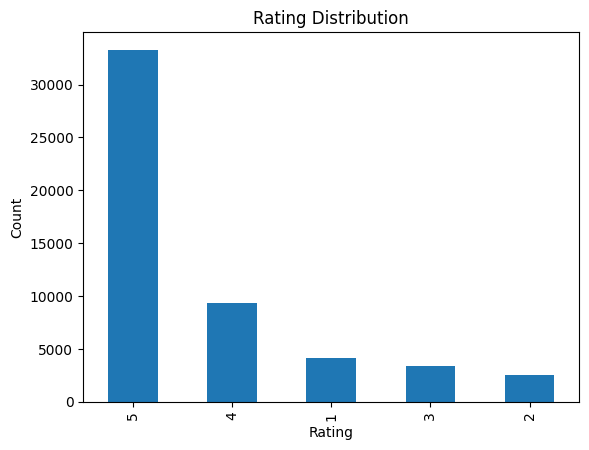

In [37]:
# Check the distribution of the 'rating' column
rating_counts = filtered_product_reviews['rating'].value_counts()

# Print the distribution
print("Rating Distribution")
print(rating_counts)

print()

# Calculate the percentage distribution
rating_percentage = filtered_product_reviews['rating'].value_counts(normalize=True) * 100

# Print the percentage distribution
print("Rating Percentage Distribution:")
print(rating_percentage)


# Plot the distribution if you want a visual representation
import matplotlib.pyplot as plt

rating_counts.plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


### Apply balancing on distribution rating
We will apply a combination of undersampling on the majority class (e.g. Rating 5) and oversampling (SMOTE) on the minority classes. 

Balanced Rating Distribution:
rating
5    19406
4    16260
1     6894
3     5851
2     4283
Name: count, dtype: int64

Balanced Rating Percentage Distribution:
rating
5    36.827722
4    30.857403
1    13.083083
3    11.103731
2     8.128060
Name: count, dtype: float64


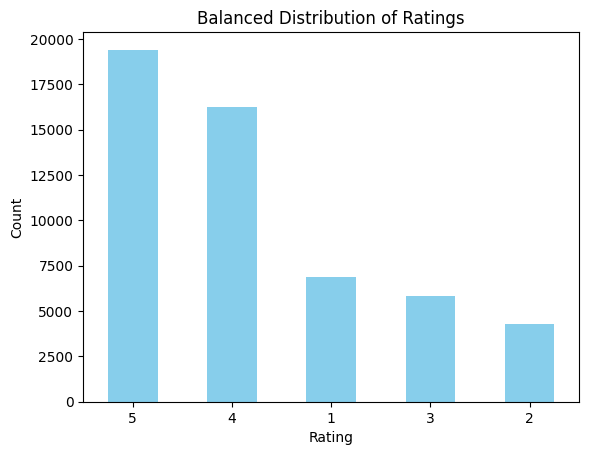

In [38]:
# Apply combination of over and undersampling.
from sklearn.utils import resample

# Separate majority (rating 5) and minority classes
majority_class = filtered_product_reviews[filtered_product_reviews['rating'] == 5]
minority_classes = filtered_product_reviews[filtered_product_reviews['rating'] != 5]

# Determine the number of samples for the balanced dataset
n_majority = len(majority_class)
n_minority = len(minority_classes)

# Undersample the majority class
undersampled_majority_class = resample(majority_class, 
                                       replace=False,  # Do not replace
                                       n_samples=n_minority,  # Match minority class size
                                       random_state=42)  # For reproducibility

# Oversample the minority classes
oversampled_minority_classes = resample(minority_classes, 
                                        replace=True,  # Allow replacement to generate more samples
                                        n_samples=n_majority,  # Match majority class size
                                        random_state=42)  # For reproducibility

# Combine the resampled data
balanced_data = pd.concat([oversampled_minority_classes, undersampled_majority_class])

# Check the distribution of ratings in the balanced DataFrame
balanced_distribution = balanced_data['rating'].value_counts()

print("Balanced Rating Distribution:")
print(balanced_distribution)

print()

# Calculate the percentage distribution in the balanced dataset
balanced_percentage = balanced_distribution / balanced_distribution.sum() * 100
print("Balanced Rating Percentage Distribution:")
print(balanced_percentage)

# Plot the distribution
balanced_distribution.plot(kind='bar', color='skyblue')
plt.title('Balanced Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.show()


Size of majority class: 33288
Size of minority classes: 19406
Balanced Rating Distribution:
rating
1    33288
4    33288
3    33288
2    33288
5    33288
Name: count, dtype: int64

Balanced Rating Percentage Distribution:
rating
1    20.0
4    20.0
3    20.0
2    20.0
5    20.0
Name: count, dtype: float64


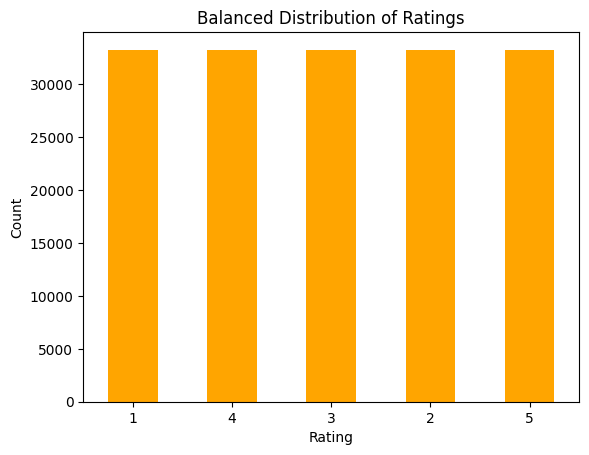

In [39]:
# Assuming 'filtered_product_reviews' is your DataFrame and 'rating' is the column of interest

# Separate majority (rating 5) and minority classes
majority_class = filtered_product_reviews[filtered_product_reviews['rating'] == 5]
minority_classes = filtered_product_reviews[filtered_product_reviews['rating'] != 5]

# Determine the number of samples for the balanced dataset
n_majority = len(majority_class)  # Size of the majority class
n_minority = len(minority_classes)  # Size of the minority classes combined

# Determine the target size for balancing all classes to the size of the majority class
target_size = n_majority

# Print sizes for debugging
print(f"Size of majority class: {target_size}")
print(f"Size of minority classes: {n_minority}")

# Oversample the minority classes to match the majority class size
resampled_minority_classes = []
for rating in minority_classes['rating'].unique():
    class_data = minority_classes[minority_classes['rating'] == rating]
    resampled_class_data = resample(class_data, 
                                    replace=True,  # Allow replacement to generate more samples
                                    n_samples=target_size,  # Match the target size
                                    random_state=42)  # For reproducibility
    resampled_minority_classes.append(resampled_class_data)

# Combine all resampled minority classes
oversampled_minority_classes = pd.concat(resampled_minority_classes)

# If the majority class is smaller than target_size, also oversample it
if len(majority_class) < target_size:
    oversampled_majority_class = resample(majority_class, 
                                          replace=True,  # Allow replacement to generate more samples
                                          n_samples=target_size,  # Match the target size
                                          random_state=42)  # For reproducibility
else:
    # Undersample the majority class to match the target size
    oversampled_majority_class = resample(majority_class, 
                                          replace=False,  # Do not replace
                                          n_samples=target_size,  # Match the target size
                                          random_state=42)  # For reproducibility

# Combine the balanced data
balanced_data = pd.concat([oversampled_minority_classes, oversampled_majority_class])

# Check the distribution of ratings in the balanced DataFrame
balanced_distribution = balanced_data['rating'].value_counts()

print("Balanced Rating Distribution:")
print(balanced_distribution)

print()

# Calculate the percentage distribution in the balanced dataset
balanced_percentage = balanced_distribution / balanced_distribution.sum() * 100
print("Balanced Rating Percentage Distribution:")
print(balanced_percentage)

# Plot the distribution
balanced_distribution.plot(kind='bar', color='orange')
plt.title('Balanced Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.show()


Unique values in 'sentiment_level': ['low' 'high' 'medium']
Class counts:
sentiment_level
low       66576
high      66576
medium    33288
Name: count, dtype: int64
Size of the largest class ('low'): 66576
Size of minority classes: 99864
Balanced Sentiment Level Distribution:
sentiment_level
high      66576
medium    66576
low       66576
Name: count, dtype: int64

Balanced Sentiment Level Percentage Distribution:
sentiment_level
high      33.333333
medium    33.333333
low       33.333333
Name: count, dtype: float64


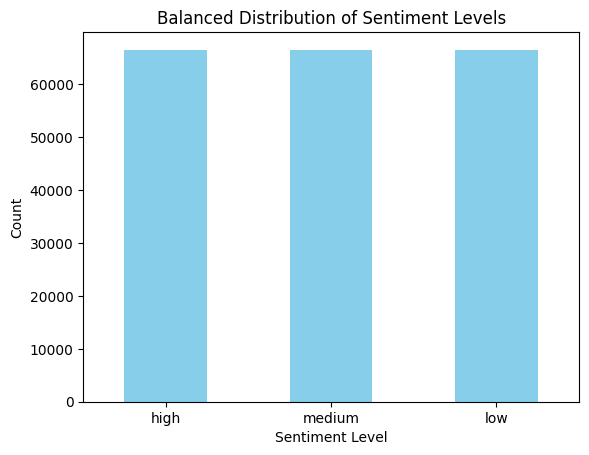

In [40]:
# Check the unique values in 'sentiment_level' to confirm the class labels
print("Unique values in 'sentiment_level':", balanced_data['sentiment_level'].unique())

# Separate classes based on sentiment levels
class_counts = balanced_data['sentiment_level'].value_counts()
print(f"Class counts:\n{class_counts}")

# Identify majority and minority classes
majority_class_label = class_counts.idxmax()  # Most frequent class label
majority_class_sentiment = balanced_data[balanced_data['sentiment_level'] == majority_class_label]
minority_classes_sentiment = balanced_data[balanced_data['sentiment_level'] != majority_class_label]

# Determine the target number of samples for each class
target_size = max(class_counts)  # Choose the size of the largest class for balancing

# Print sizes for debugging
print(f"Size of the largest class ('{majority_class_label}'): {target_size}")
print(f"Size of minority classes: {len(minority_classes_sentiment)}")

# Balance each class to the target size
resampled_minority_classes = []
for class_label in minority_classes_sentiment['sentiment_level'].unique():
    class_data = minority_classes_sentiment[minority_classes_sentiment['sentiment_level'] == class_label]
    resampled_class_data = resample(class_data, 
                                    replace=True,  # Allow replacement to generate more samples
                                    n_samples=target_size,  # Match the target size
                                    random_state=42)  # For reproducibility
    resampled_minority_classes.append(resampled_class_data)

# Combine all resampled minority classes
resampled_minority_sentiment = pd.concat(resampled_minority_classes)

# If the majority class is less than target_size, also oversample it
if len(majority_class_sentiment) < target_size:
    oversampled_majority_sentiment = resample(majority_class_sentiment, 
                                              replace=True,  # Allow replacement to generate more samples
                                              n_samples=target_size,  # Match the target size
                                              random_state=42)  # For reproducibility
else:
    # Undersample the majority class to match the target size
    oversampled_majority_sentiment = resample(majority_class_sentiment, 
                                              replace=False,  # Do not replace
                                              n_samples=target_size,  # Match the target size
                                              random_state=42)  # For reproducibility

# Combine the balanced data
balanced_sentiment_data = pd.concat([resampled_minority_sentiment, oversampled_majority_sentiment])

# Check the distribution of sentiment levels in the balanced DataFrame
balanced_sentiment_distribution = balanced_sentiment_data['sentiment_level'].value_counts()

print("Balanced Sentiment Level Distribution:")
print(balanced_sentiment_distribution)

print()

# Calculate the percentage distribution in the balanced dataset
balanced_sentiment_percentage = balanced_sentiment_distribution / balanced_sentiment_distribution.sum() * 100
print("Balanced Sentiment Level Percentage Distribution:")
print(balanced_sentiment_percentage)

# Plot the distribution
balanced_sentiment_distribution.plot(kind='bar', color='skyblue')
plt.title('Balanced Distribution of Sentiment Levels')
plt.xlabel('Sentiment Level')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.show()


In [41]:
balanced_sentiment_data.head()

author_id  rating  is_recommended  helpfulness  \
129583   8293066551       4             1.0     1.000000   
323833  10560129298       4             1.0     1.000000   
461181   1337562133       5             1.0     1.000000   
127739   6440324528       4             1.0     1.000000   
520644    853368994       5             1.0     0.789474   

                                           merged_reviews product_id  \
129583  What a great invention - Really enjoyed the me...    P421275   
323833                                No Reviews Provided    P440651   
461181  No more excess gunk! - This right here, is the...    P416816   
127739  A spot treatment that won’t stain your pillowc...    P421275   
520644  Loving this product to clear my skin - This wa...    P416815   

                                  product_name  loves_count sentiment_level  \
129583        Salicylic Acid Acne Healing Dots       316297            high   
323833   Mini Acne Control Clarifying Cleanser        12651            high   
461181       Balancing Force Oil Control Toner        98160            high   
127739        Salicylic Acid Acne Healing Dots       316297            high   
520644  Find Your Balance Oil Control Cleanser        72479            high   

        sentiment_high  sentiment_low  sentiment_medium  
129583            True          False             False  
323833            True          False             False  
461181            True          False             False  
127739            True          False             False  
520644            True          False             False

In [42]:
print(balanced_sentiment_data.dtypes)

author_id            object
rating                int64
is_recommended      float64
helpfulness         float64
merged_reviews       object
product_id           object
product_name         object
loves_count           int64
sentiment_level      object
sentiment_high         bool
sentiment_low          bool
sentiment_medium       bool
dtype: object


In [43]:
balanced_sentiment_data.shape

(199728, 12)

In [44]:
# Convert 'merged_reviews' column to string
# balanced_data['merged_reviews'] = balanced_data['merged_reviews'].astype(str)

# Verify the change
# print(balanced_data.dtypes)

### Sentence Tokenization
In this step, we will create a dataframe called "test" prior to any preprocessing steps to visualise frequent word distribution and a word cloud.

In [45]:
test = balanced_sentiment_data[['product_id','merged_reviews']]

In [46]:
print(balanced_sentiment_data.merged_reviews.index)

Index([129583, 323833, 461181, 127739, 520644, 805887, 787723, 129705, 795513,
        89542,
       ...
       497350,  86700,  90264, 520169, 780087, 126196, 293797, 702771,  88644,
       620634],
      dtype='int64', length=199728)


In [47]:
#Tokenize the first review into sentence
tokenized_sent = sent_tokenize(test.merged_reviews[129265])
print(tokenized_sent)
print('number of sentences:' + str(len(tokenized_sent)))

['really help - These have been a lifesaver for me.', 'I have adult hormonal acne around my jaw line and these help speed up the recovery immensely.', 'I get best results when I pop a pimple and then cover it with one of these overnight.', 'By the morning it is greatly reduced in size and redness and I can easily cover with makeup.', 'I just wish they weren’t so pricey since I use so many of them.', 'I tried a cheaper brand on amazon and just didn’t get the same results and came back to Peace Out.', 'I always get the 40 pack to get the better deal.']
number of sentences:7


### Word Tokenization

In [48]:
tokenized_words = word_tokenize(test.merged_reviews[129265])
print(tokenized_words)
print('number of words:' + str(len(tokenized_words)))

['really', 'help', '-', 'These', 'have', 'been', 'a', 'lifesaver', 'for', 'me', '.', 'I', 'have', 'adult', 'hormonal', 'acne', 'around', 'my', 'jaw', 'line', 'and', 'these', 'help', 'speed', 'up', 'the', 'recovery', 'immensely', '.', 'I', 'get', 'best', 'results', 'when', 'I', 'pop', 'a', 'pimple', 'and', 'then', 'cover', 'it', 'with', 'one', 'of', 'these', 'overnight', '.', 'By', 'the', 'morning', 'it', 'is', 'greatly', 'reduced', 'in', 'size', 'and', 'redness', 'and', 'I', 'can', 'easily', 'cover', 'with', 'makeup', '.', 'I', 'just', 'wish', 'they', 'weren', '’', 't', 'so', 'pricey', 'since', 'I', 'use', 'so', 'many', 'of', 'them', '.', 'I', 'tried', 'a', 'cheaper', 'brand', 'on', 'amazon', 'and', 'just', 'didn', '’', 't', 'get', 'the', 'same', 'results', 'and', 'came', 'back', 'to', 'Peace', 'Out', '.', 'I', 'always', 'get', 'the', '40', 'pack', 'to', 'get', 'the', 'better', 'deal', '.']
number of words:119


In [49]:
#Loop through all reviews and tokenize into words
test_all_words = [word.lower() for sent in test['merged_reviews'] for word in word_tokenize(sent)]

#print the first 10 words
print(test_all_words[:10])

['what', 'a', 'great', 'invention', '-', 'really', 'enjoyed', 'the', 'message', 'and']


### Create Frequency Distribution of all words

In [50]:
# Calculate the number of occurence of each word in the entire list of words
test_all_words_frequency = FreqDist(test_all_words)
print (test_all_words_frequency)

# print 10 most frequently occurring words
print ("\nTop 10 most frequently occurring words")
print (test_all_words_frequency.most_common(10))

# print 10 least frequently occurring words
print ("\nTop 10 least frequently occurring words")
print (test_all_words_frequency.most_common()[-10:])

<FreqDist with 22316 samples and 11850476 outcomes>

Top 10 most frequently occurring words
[('.', 534415), ('i', 525322), ('it', 385212), ('the', 294839), (',', 279167), ('and', 278481), ('’', 255828), ('my', 249769), ('a', 232264), ('this', 223458)]

Top 10 least frequently occurring words
[('lovre', 1), ('up.fluid', 1), ('well-made', 1), ('detailing', 1), ('over-hydrate', 1), ('detectable', 1), ('balled', 1), ('percentile', 1), ('flimsiness', 1), ('suffocated', 1)]


### Visualize Frequent Words using Distribution

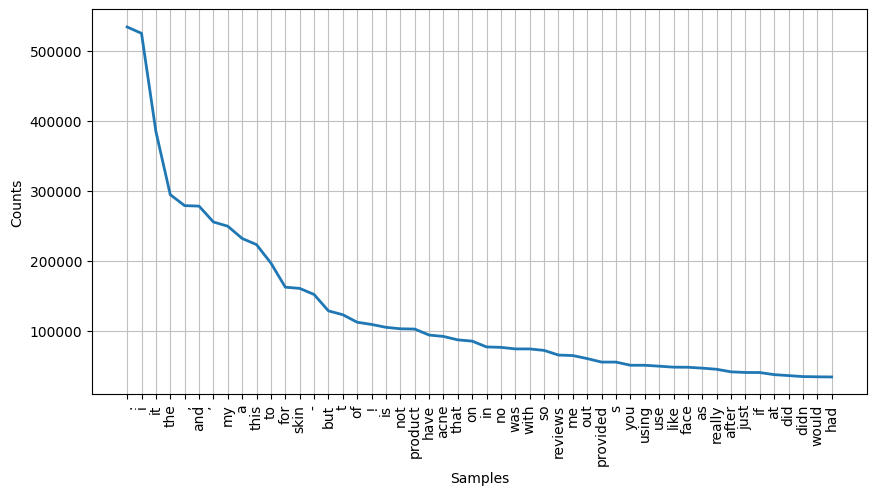

In [51]:
# create a function to plot the frequency, make it a function as we will be re-using it later.
def plot_frequency(freq):
    plt.figure(figsize=(10,5))
    freq.plot(50, cumulative=False)
    plt.show()

plot_frequency(test_all_words_frequency)

### Visualise Frequent Words using Word Cloud

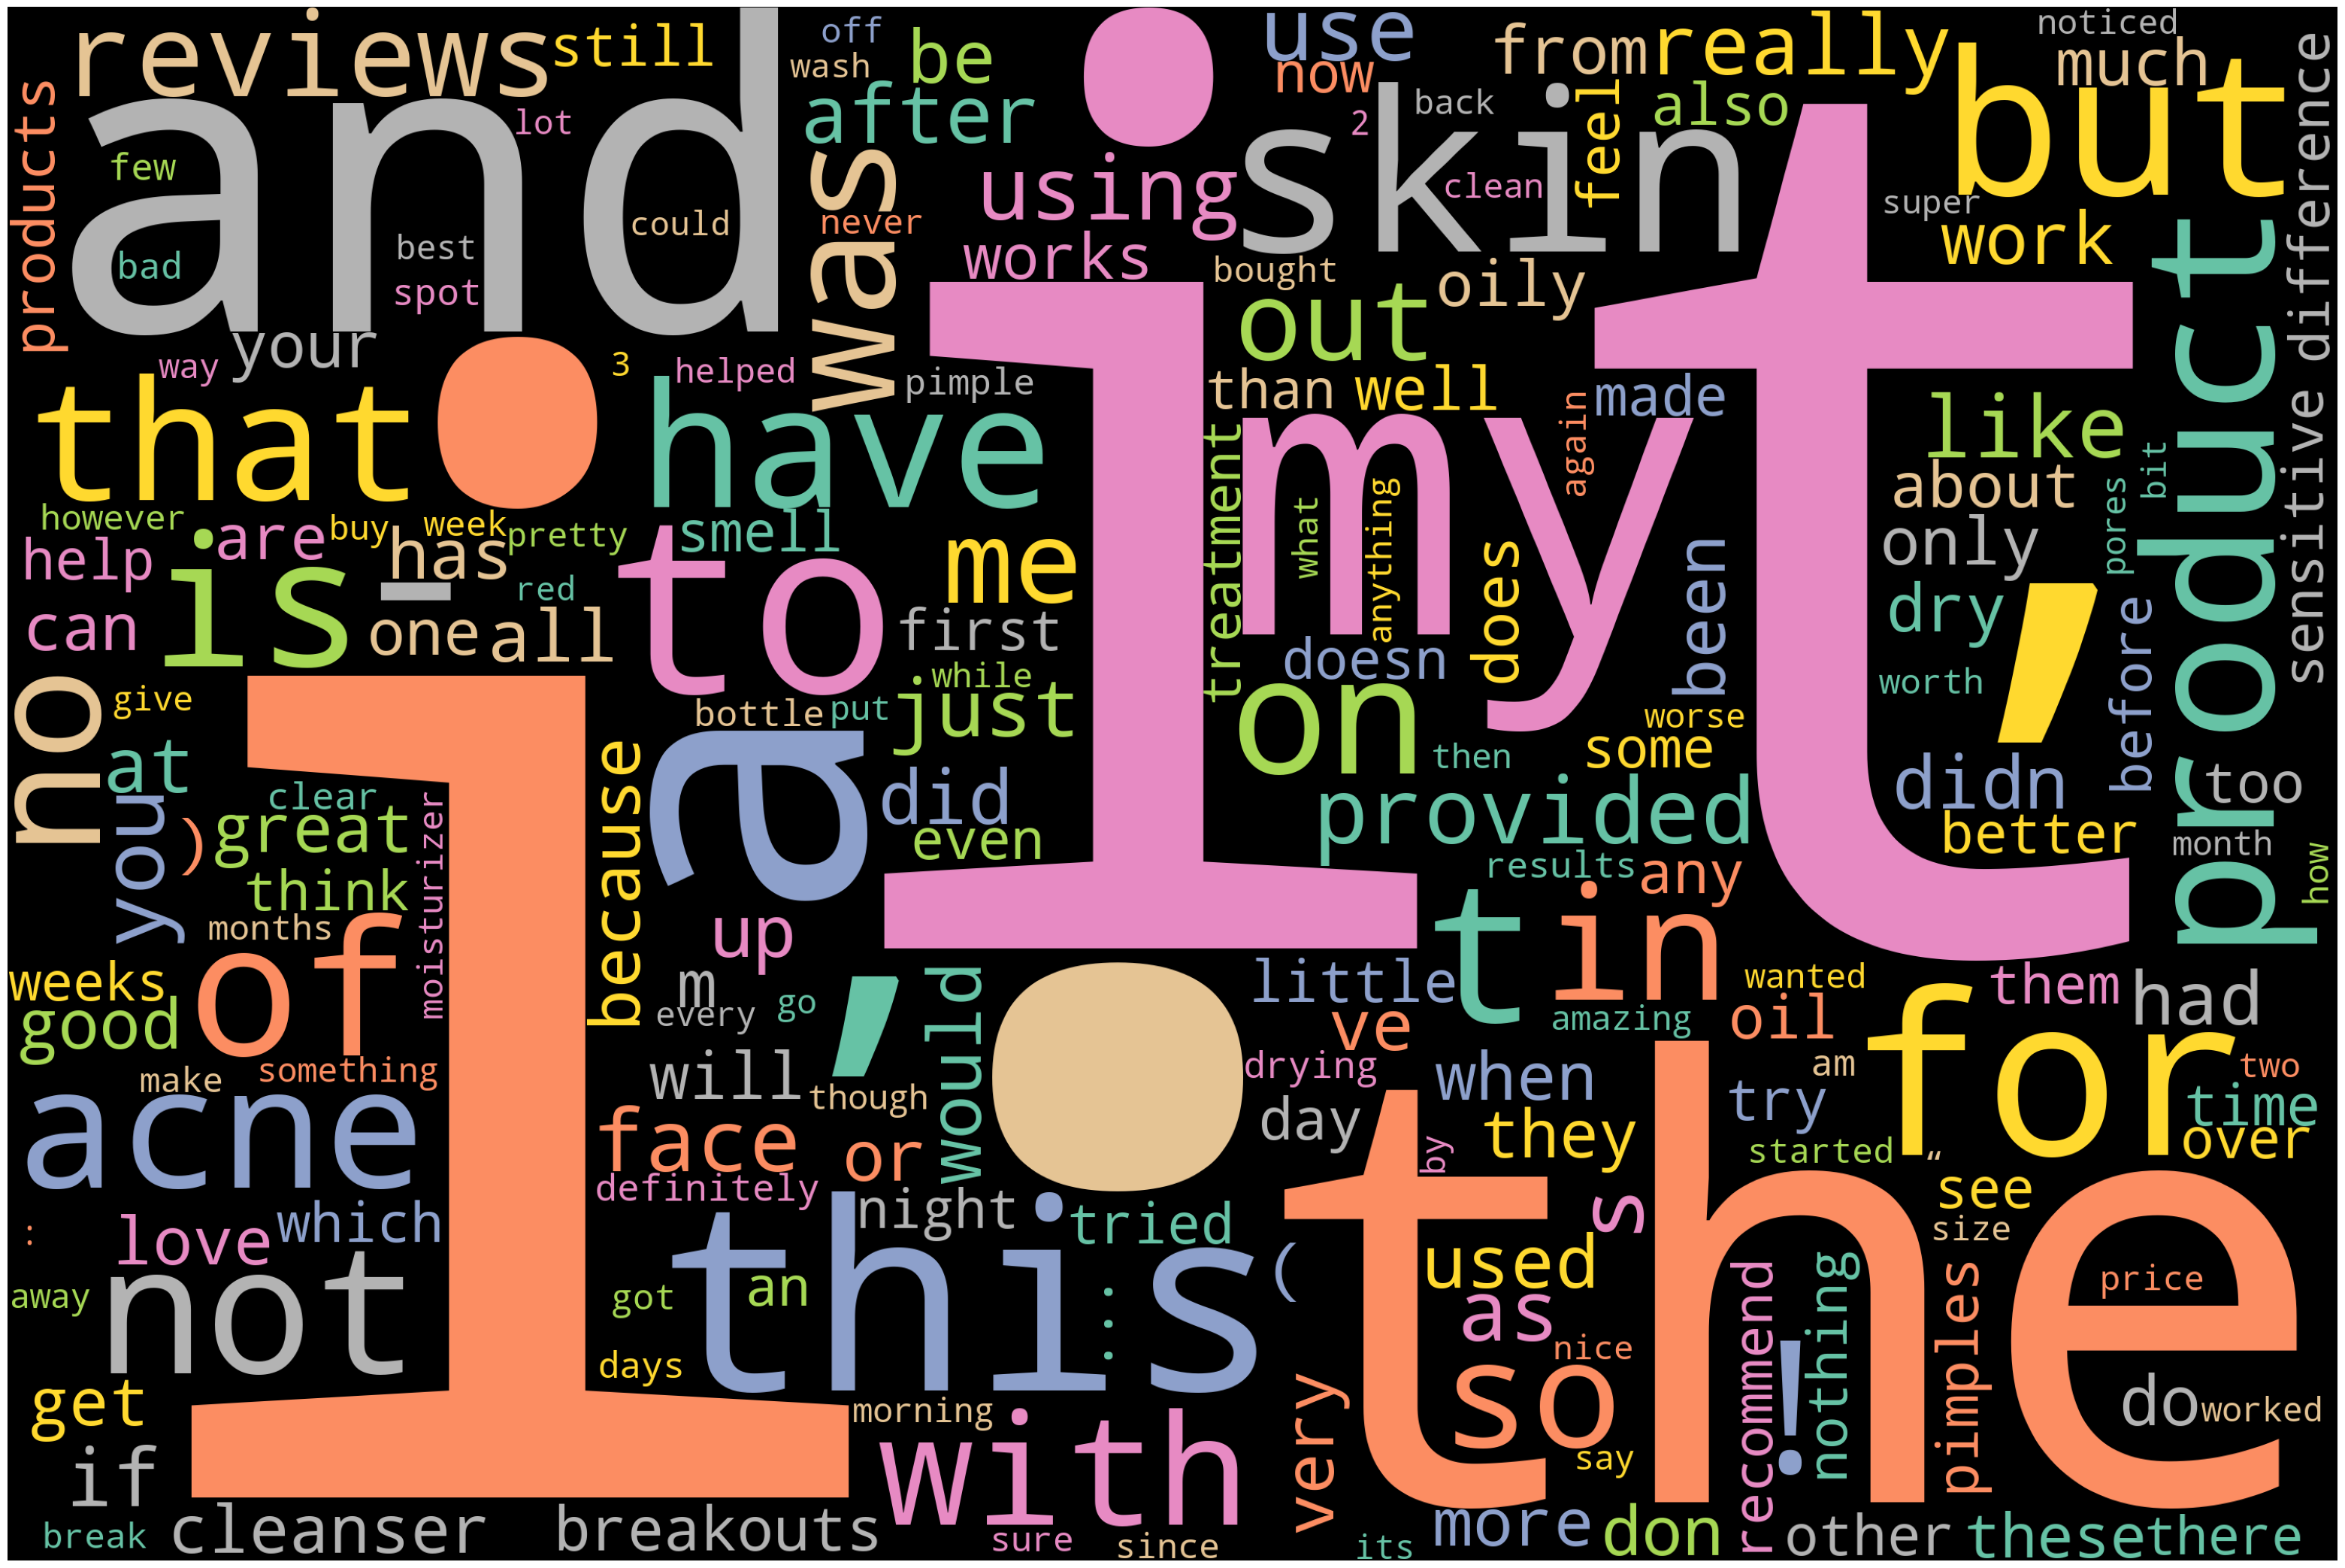

In [52]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    
wordcloud = WordCloud(width=3000, height=2000, colormap='Set2',
                      collocations=False, max_words=200)
wordcloud.generate_from_frequencies(frequencies=test_all_words_frequency)

# Plot
plot_cloud(wordcloud)

### Step 5: Data Preprocessing
### Stop word removal

In [53]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove mentions (@) and hastags (#)
    text = re.sub(r"\@\w+|\#", '', text)
    
    # Remove numbers and any other special characters
    text = re.sub(r"\d+", '', text)  # Remove numbers
    text = re.sub(r"[^a-zA-Z\s]", '', text) # Remove special characters
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply preprocessing to the 'merged_reviews' column
balanced_sentiment_data['clean_reviews'] = balanced_sentiment_data['merged_reviews'].apply(preprocess_text)

### Tokenization and Lemmatization

In [54]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define lemmatization function
def lemmatize_word(word):
    return lemmatizer.lemmatize(word, pos=wordnet.VERB)

# Tokenize and lemmatize
balanced_sentiment_data['tokens'] = balanced_sentiment_data['clean_reviews'].apply(word_tokenize)
balanced_sentiment_data['lemmatized_tokens'] = balanced_sentiment_data['tokens'].apply(lambda x: [lemmatize_word(word) for word in x])

# Combine lemmatized tokens back into single string for TF-IDF
balanced_sentiment_data['lemmatized_text'] = balanced_sentiment_data['lemmatized_tokens'].apply(lambda x: ' '.join(x))


In [55]:
# Create a mapping for sentiment encoding.
# Encode sentiment levels into numerical values.

sentiment_mapping = {'high': 1, 'medium': 0, 'low': -1}
balanced_sentiment_data['sentiment_encoded'] = balanced_sentiment_data['sentiment_level'].map(sentiment_mapping)


### Feature Engineering (TF-IDF)

In [56]:
# # Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Limit to 10,000 features

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(balanced_sentiment_data['lemmatized_text'])
y_tfidf = balanced_sentiment_data['sentiment_encoded']


# Reduce dimensions
svd = TruncatedSVD(n_components=100)  # Reduce to 100 components
X_reduced = svd.fit_transform(X_tfidf)

# Create a DataFrame of the reduced TF-IDF features
tfidf_df = pd.DataFrame(X_reduced, index=balanced_sentiment_data.index)

# Get feature names (terms) and their corresponding TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = X_tfidf.sum(axis=0).A1

# Create a dictionary with feature names and their TF-IDF scores
word_freq = dict(zip(feature_names, tfidf_scores))

#Optionally, sort the dictionary by TF-IDF score
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

# Print or use sorted_word_freq as needed
print(sorted_word_freq)

{'provide': 41170.63823873808, 'review': 38295.44969200255, 'skin': 10180.631840884382, 'use': 8527.822304531961, 'product': 7412.517770125667, 'acne': 6994.423076553436, 'work': 6216.7808400945605, 'dry': 5032.7778474515535, 'like': 4451.30694552453, 'didnt': 4396.032495051553, 'get': 4366.549264243037, 'really': 4360.774534684265, 'face': 4319.073123570718, 'make': 3922.041779321165, 'help': 3697.4295886061736, 'try': 3621.3662465987795, 'feel': 3581.392359335309, 'love': 3539.051728747505, 'good': 3336.5999180944837, 'great': 3259.082698913428, 'dont': 3257.552791285138, 'would': 3242.389983344313, 'cleanser': 3129.6301414447967, 'smell': 3096.2263555232566, 'ive': 3078.821100295342, 'break': 2999.5196051656203, 'go': 2902.3326392064037, 'see': 2763.999279343786, 'clear': 2763.4492100789275, 'much': 2745.3684889174833, 'im': 2682.5316234384395, 'oily': 2663.8393092642373, 'breakouts': 2582.075411938309, 'time': 2553.7185419574193, 'spot': 2541.1783669226097, 'buy': 2540.775564128463

In [57]:
# Encode labels
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(balanced_data['sentiment_level'])

In [58]:
balanced_sentiment_data.head()

author_id  rating  is_recommended  helpfulness  \
129583   8293066551       4             1.0     1.000000   
323833  10560129298       4             1.0     1.000000   
461181   1337562133       5             1.0     1.000000   
127739   6440324528       4             1.0     1.000000   
520644    853368994       5             1.0     0.789474   

                                           merged_reviews product_id  \
129583  What a great invention - Really enjoyed the me...    P421275   
323833                                No Reviews Provided    P440651   
461181  No more excess gunk! - This right here, is the...    P416816   
127739  A spot treatment that won’t stain your pillowc...    P421275   
520644  Loving this product to clear my skin - This wa...    P416815   

                                  product_name  loves_count sentiment_level  \
129583        Salicylic Acid Acne Healing Dots       316297            high   
323833   Mini Acne Control Clarifying Cleanser        12651            high   
461181       Balancing Force Oil Control Toner        98160            high   
127739        Salicylic Acid Acne Healing Dots       316297            high   
520644  Find Your Balance Oil Control Cleanser        72479            high   

        sentiment_high  sentiment_low  sentiment_medium  \
129583            True          False             False   
323833            True          False             False   
461181            True          False             False   
127739            True          False             False   
520644            True          False             False   

                                            clean_reviews  \
129583  great invention really enjoyed message technol...   
323833                                   reviews provided   
461181  excess gunk right bomb leaves really nice fres...   
127739  spot treatment wont stain pillowcase picked re...   
520644  loving product clear skin wash leaves skin ext...   

                                                   tokens  \
129583  [great, invention, really, enjoyed, message, t...   
323833                                [reviews, provided]   
461181  [excess, gunk, right, bomb, leaves, really, ni...   
127739  [spot, treatment, wont, stain, pillowcase, pic...   
520644  [loving, product, clear, skin, wash, leaves, s...   

                                        lemmatized_tokens  \
129583  [great, invention, really, enjoy, message, tec...   
323833                                  [review, provide]   
461181  [excess, gunk, right, bomb, leave, really, nic...   
127739  [spot, treatment, wont, stain, pillowcase, pic...   
520644  [love, product, clear, skin, wash, leave, skin...   

                                          lemmatized_text  sentiment_encoded  
129583  great invention really enjoy message technolog...                  1  
323833                                     review provide                  1  
461181  excess gunk right bomb leave really nice fresh...                  1  
127739  spot treatment wont stain pillowcase pick repl...                  1  
520644  love product clear skin wash leave skin extrem...                  1

In [59]:
# (NEW) Combine the TF-IDF features with the ratings data to create a richer user profile.

# Combine the TF-IDF features with the ratings data
# user_profiles = pd.concat([balanced_data[['author_id', 'rating']], tfidf_df], axis=1)

# Aggregate user profiles: average ratings and TF-IDF features
# user_profiles_aggregated = user_profiles.groupby('author_id').agg('mean')
# print(user_profiles_aggregated)


### Visualising the Cleaned Word Cloud

In [60]:
# Convert the dictionary to a format suitable for WordCloud
filtered_word_freq = {word: freq for word, freq in word_freq.items() if freq > 0}

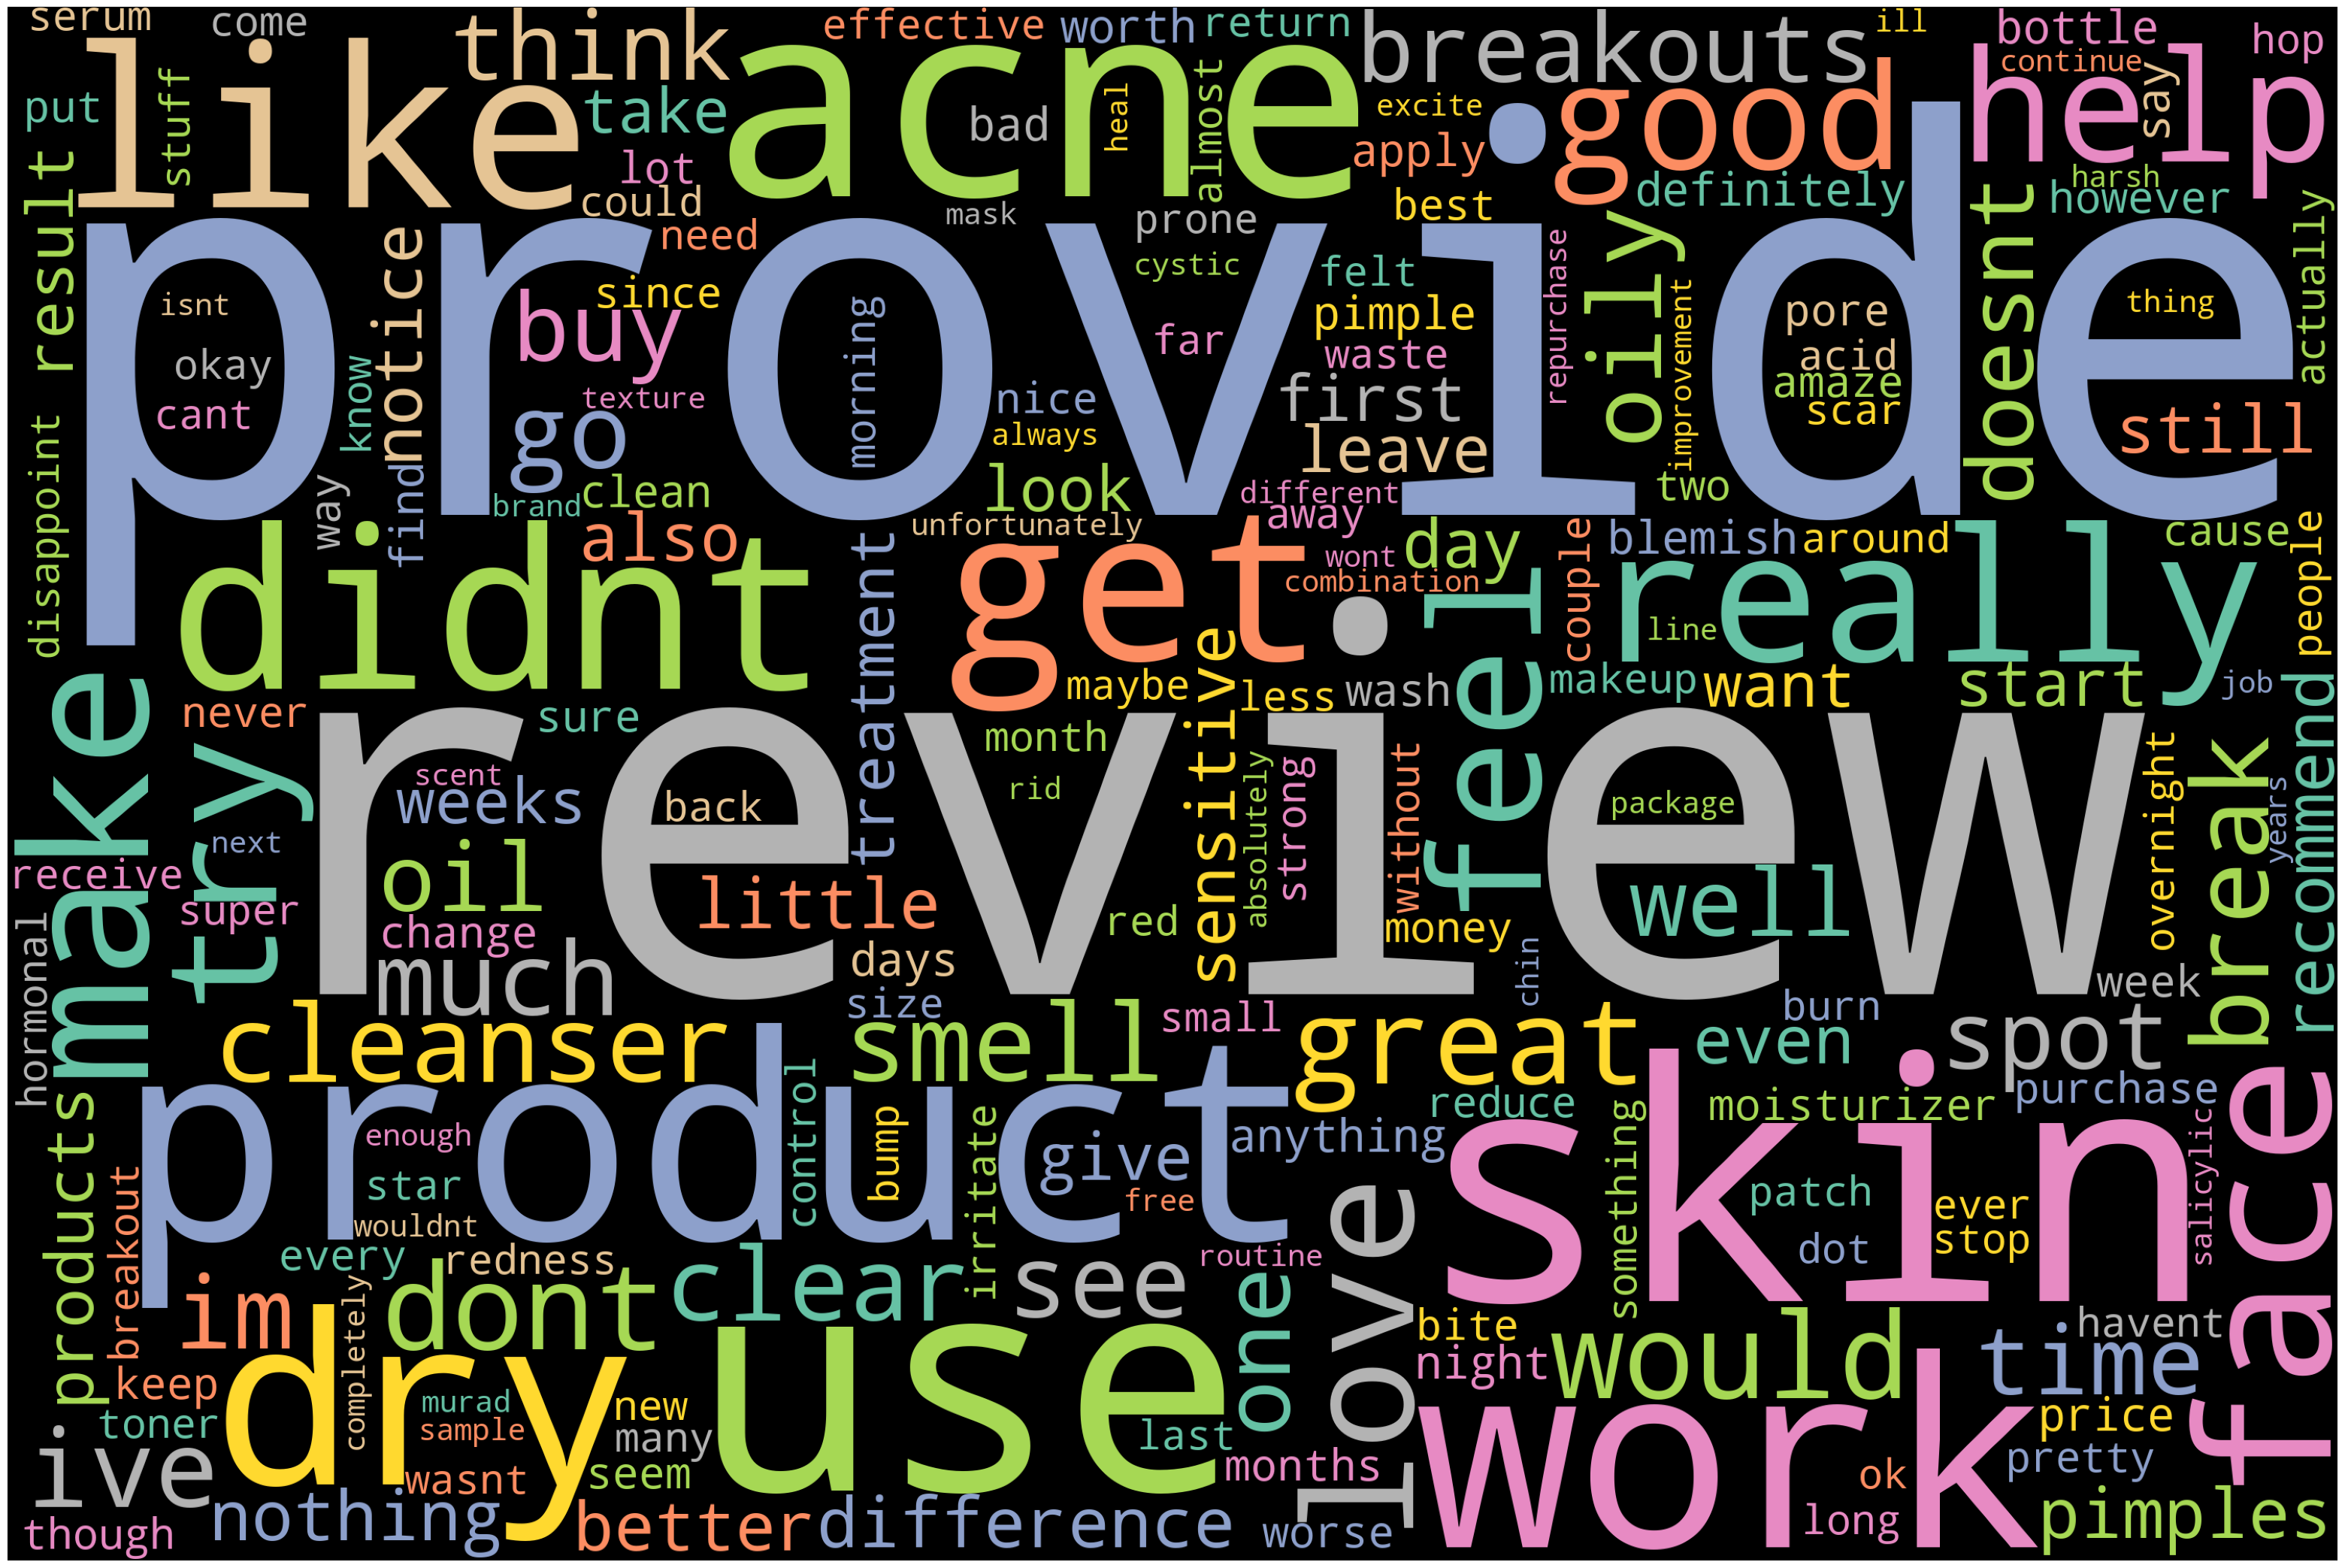

In [61]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    
wordcloud = WordCloud(width=3000, height=2000, colormap='Set2',
                      collocations=False, max_words=200)
wordcloud.generate_from_frequencies(frequencies=filtered_word_freq)

# Plot
plot_cloud(wordcloud)

### Removal of Rare and Frequent Words

In [62]:
# Flatten the list of filtered tokens to count frequency
all_filtered_tokens = [word for tokens in balanced_sentiment_data['lemmatized_tokens'] for word in tokens]
filtered_token_freq = Counter(all_filtered_tokens)

# Define thresholds for rare and frequent words
rare_threshold = 5
frequent_threshold = 100

# Identify rare and frequent words
rare_words = set(word for word, count in filtered_token_freq.items() if count < rare_threshold)
frequent_words = set(word for word, count in filtered_token_freq.items() if count > frequent_threshold)

# Define the filter_tokens function
def filter_tokens(tokens):
    return [word for word in tokens if word not in rare_words and word not in frequent_words]

# Apply the function to the DataFrame
balanced_sentiment_data['lemmatized_tokens'] = balanced_sentiment_data['lemmatized_tokens'].apply(filter_tokens)

# Common words to remove from the final cleaned word cloud
common_words = ['provide', 'review', 'hot', 'admit', 'catch', 'brown', 'pillowcase', 'sooooo', 'waso', 'express', 'dress', 'encourage']  # Adjust as needed

# Remove common words from the final cleaned token frequency
filtered_token_freq_clean = Counter(word for word in all_filtered_tokens if word not in rare_words and word not in frequent_words and word not in common_words)

# Apply the function to the DataFrame again to remove common words
balanced_sentiment_data['lemmatized_tokens'] = balanced_sentiment_data['lemmatized_tokens'].apply(lambda tokens: [word for word in tokens if word not in common_words])


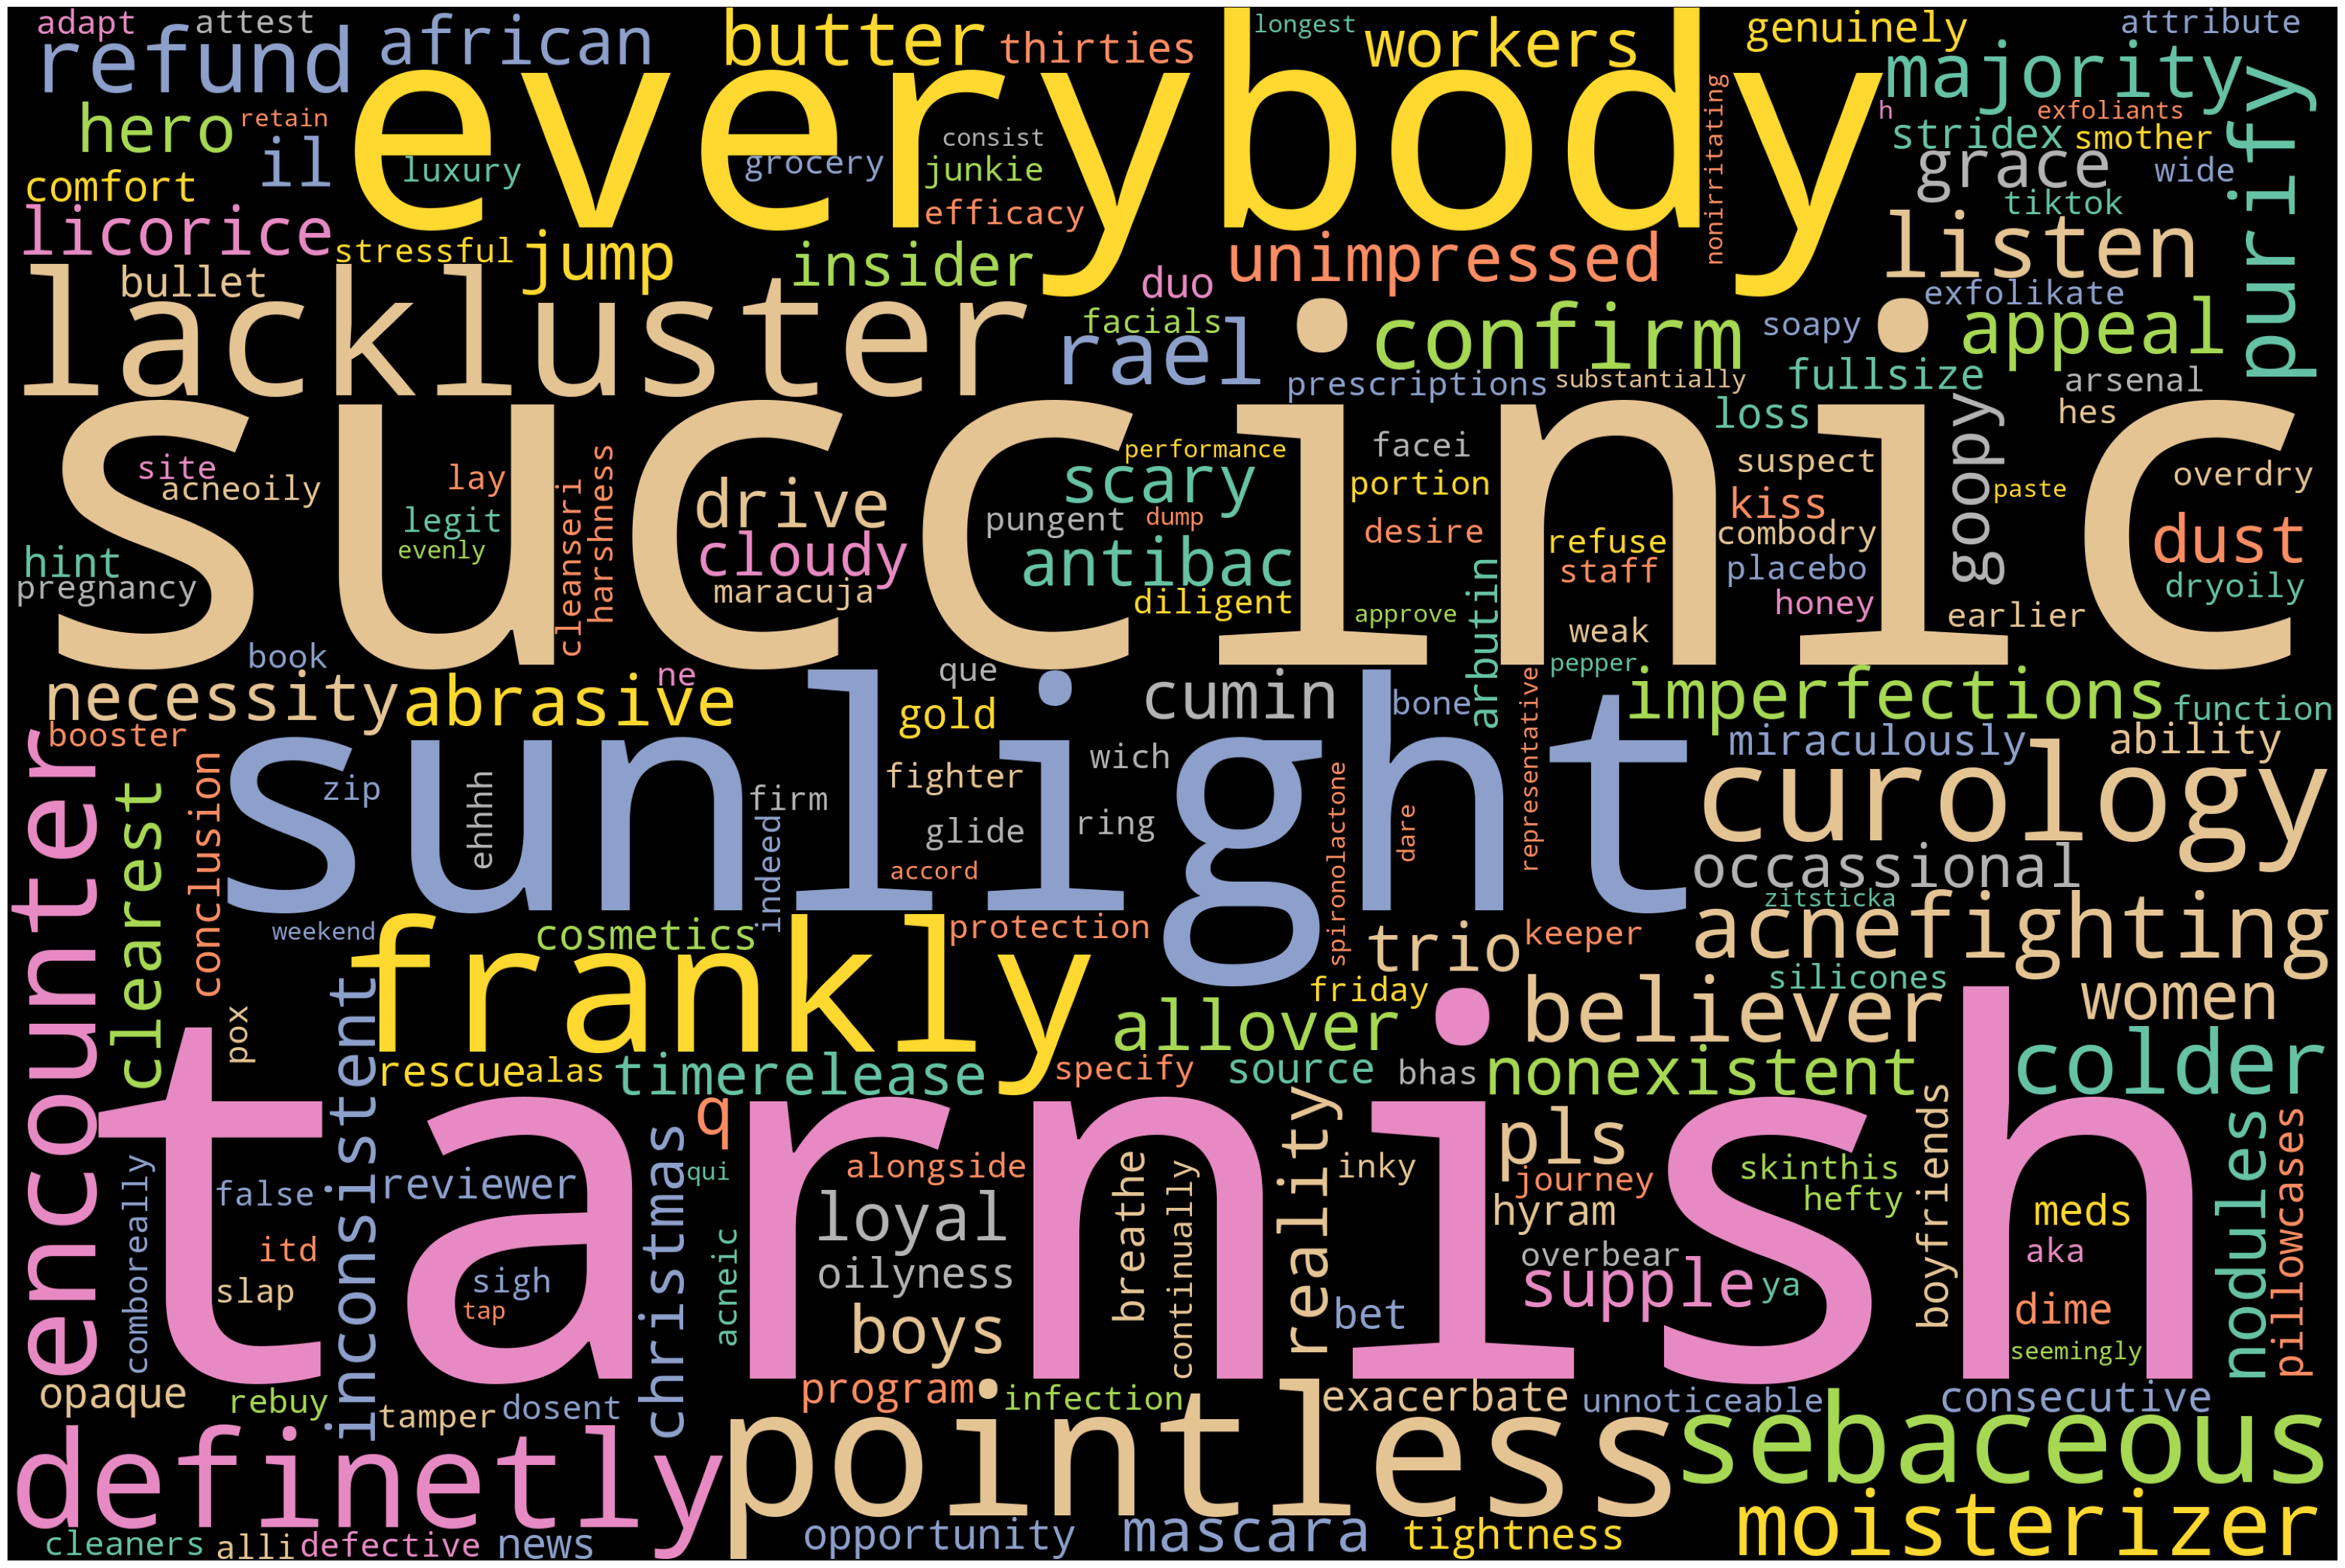

In [63]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    
wordcloud = WordCloud(width=3000, height=2000, colormap='Set2',
                      collocations=False, max_words=200)
wordcloud.generate_from_frequencies(frequencies=filtered_token_freq_clean)

# Plot
plot_cloud(wordcloud)


-------------------------------------------------------------------------------
## Product Recommendation System using Ratings
Create a matrix that contains the Author ID as the index, and Product name as a column. We use the pivot function to use the Author ID as the index and the Product Name as column.

### Aggregate Multiple Ratings for the Same User-Product Pair

In [64]:
# Aggregate multiple ratings for the same user-product pair by taking their mean
ratings = balanced_sentiment_data.groupby(['author_id', 'product_name'], as_index=False).agg({'rating': 'mean'})
ratings.head(30)

author_id                                       product_name  rating
0   10000117144                   Acne Control Clarifying Cleanser     5.0
1   10000117144              Mini Acne Control Clarifying Cleanser     5.0
2   10001502449                   Acne Control Clarifying Cleanser     5.0
3   10001961830        Niacinamide 10% + Zinc 1% Oil Control Serum     5.0
4    1000235057                           EradiKate Acne Treatment     5.0
5    1000235057                   Salicylic Acid Acne Healing Dots     5.0
6    1000284455                   Acne Control Clarifying Cleanser     5.0
7    1000296322       Goodbye Acne  Max Complexion Correction Pads     4.0
8   10003432083                   Salicylic Acid Acne Healing Dots     2.0
9   10004122080                  Balancing Force Oil Control Toner     2.0
10  10004127873  U.F.O. Salicylic Acid BHA Acne Treatment Face Oil     5.0
11  10004128984  EradiKate Acne Mark Fading Gel with Salicylic ...     1.0
12   1000416744                   Salicylic Acid Acne Healing Dots     4.0
13  10005368592                   Rapid Relief Acne Spot Treatment     3.0
14  10005368689  Skin Squad Pre + ProbioticSupplement for Acne-...     5.0
15  10005488737                   Acne Clearing Skin Wash Cleanser     5.0
16  10005488737  Acne+ 2% BHA and Azelaic Acid Acne Spot Treatment     4.0
17  10005488737     Deep Relief Acne Treatment with Salicylic Acid     4.0
18  10005524977                  Balancing Force Oil Control Toner     5.0
19  10005524977             Find Your Balance Oil Control Cleanser     5.0
20  10005943633                  Balancing Force Oil Control Toner     4.0
21  10005943633             Find Your Balance Oil Control Cleanser     5.0
22  10005985417                  Balancing Force Oil Control Toner     5.0
23  10005985417             Find Your Balance Oil Control Cleanser     4.0
24  10006368415                      Anti Bac Acne Clearing Lotion     5.0
25  10006486800                  Balancing Force Oil Control Toner     5.0
26  10006486800             Find Your Balance Oil Control Cleanser     5.0
27  10006508738             Find Your Balance Oil Control Cleanser     5.0
28  10006552426             Find Your Balance Oil Control Cleanser     4.0
29  10007009256                  Balancing Force Oil Control Toner     5.0

### Create a user-user similarity matrix

In [65]:
# Creating a user-user similarity matrix
# Pivot the data to create a user-item matrix
user_item_matrix = ratings.pivot(index='author_id', columns='product_name', values='rating')

# Fill NaN values with 0 or any other appropriate method
user_item_matrix = user_item_matrix.fillna(0)

### Compute Pairwise Cosine Similarity

In [66]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
user_user_sim_matrix = pd.DataFrame(
    cosine_similarity(user_item_matrix),
    index=user_item_matrix.index,
    columns=user_item_matrix.index
)

# Display the similarity matrix
print(user_user_sim_matrix.head())

author_id    10000117144  10001502449  10001961830  1000235057  1000284455  \
author_id                                                                    
10000117144     1.000000     0.707107          0.0         0.0    0.707107   
10001502449     0.707107     1.000000          0.0         0.0    1.000000   
10001961830     0.000000     0.000000          1.0         0.0    0.000000   
1000235057      0.000000     0.000000          0.0         1.0    0.000000   
1000284455      0.707107     1.000000          0.0         0.0    1.000000   

author_id    1000296322  10003432083  10004122080  10004127873  10004128984  \
author_id                                                                     
10000117144         0.0     0.000000          0.0          0.0          0.0   
10001502449         0.0     0.000000          0.0          0.0          0.0   
10001961830         0.0     0.000000          0.0          0.0          0.0   
1000235057          0.0     0.707107          0.0         

In [67]:
# Verify the dimensions
print("User-item matrix shape:", user_item_matrix.shape)
print("User-user similarity matrix shape:", user_user_sim_matrix.shape)

User-item matrix shape: (33743, 88)
User-user similarity matrix shape: (33743, 33743)


In [68]:
# Verify consistency
print("User-user similarity matrix columns:", user_user_sim_matrix.columns)
print("User-item matrix indices:", user_item_matrix.index)

User-user similarity matrix columns: Index(['10000117144', '10001502449', '10001961830', '1000235057', '1000284455',
       '1000296322', '10003432083', '10004122080', '10004127873',
       '10004128984',
       ...
       '999501371', '9995497131', '9996449006', '9996967068', '9997103882',
       '9997507530', '999804809', 'dummyUser', 'orderGen1698648',
       'orderGen51156'],
      dtype='object', name='author_id', length=33743)
User-item matrix indices: Index(['10000117144', '10001502449', '10001961830', '1000235057', '1000284455',
       '1000296322', '10003432083', '10004122080', '10004127873',
       '10004128984',
       ...
       '999501371', '9995497131', '9996449006', '9996967068', '9997103882',
       '9997507530', '999804809', 'dummyUser', 'orderGen1698648',
       'orderGen51156'],
      dtype='object', name='author_id', length=33743)


In [69]:
# Reassign indices and columns
user_user_sim_matrix.index = user_item_matrix.index
user_user_sim_matrix.columns = user_item_matrix.index

In [70]:
# Display the first few rows of the user-user similarity matrix
user_user_sim_matrix.head()

author_id    10000117144  10001502449  10001961830  1000235057  1000284455  \
author_id                                                                    
10000117144     1.000000     0.707107          0.0         0.0    0.707107   
10001502449     0.707107     1.000000          0.0         0.0    1.000000   
10001961830     0.000000     0.000000          1.0         0.0    0.000000   
1000235057      0.000000     0.000000          0.0         1.0    0.000000   
1000284455      0.707107     1.000000          0.0         0.0    1.000000   

author_id    1000296322  10003432083  10004122080  10004127873  10004128984  \
author_id                                                                     
10000117144         0.0     0.000000          0.0          0.0          0.0   
10001502449         0.0     0.000000          0.0          0.0          0.0   
10001961830         0.0     0.000000          0.0          0.0          0.0   
1000235057          0.0     0.707107          0.0          0.0          0.0   
1000284455          0.0     0.000000          0.0          0.0          0.0   

author_id    ...  999501371  9995497131  9996449006  9996967068  9997103882  \
author_id    ...                                                              
10000117144  ...        0.0         0.0         0.0         0.0         0.0   
10001502449  ...        0.0         0.0         0.0         0.0         0.0   
10001961830  ...        0.0         1.0         0.0         0.0         0.0   
1000235057   ...        0.0         0.0         0.0         0.0         0.0   
1000284455   ...        0.0         0.0         0.0         0.0         0.0   

author_id    9997507530  999804809  dummyUser  orderGen1698648  orderGen51156  
author_id                                                                      
10000117144         0.0        0.0        0.0              0.0            0.0  
10001502449         0.0        0.0        0.0              0.0            0.0  
10001961830         0.0        0.0        0.0              0.0            0.0  
1000235057          0.0        0.0        0.0              0.0            0.0  
1000284455          0.0        0.0        0.0              0.0            0.0  

[5 rows x 33743 columns]

In [71]:
# Implement recommendation function. 
# Recommending products based on ratings. 

def recommend_products(user_id, user_item_matrix, user_user_sim_matrix, num_recommendations=10):
    if user_id not in user_item_matrix.index:
        print(f"User ID {user_id} not found in user_item_matrix.")
        return None

    # Get similar users
    similar_users = user_user_sim_matrix.loc[user_id].sort_values(ascending=False)

    # Initialize a dictionary to hold the product scores
    product_scores = {}

    # Loop through similar users
    for similar_user in similar_users.index:
        if similar_user == user_id:
            continue  # Skip the user itself

        # Get the ratings of the similar user
        similar_user_ratings = user_item_matrix.loc[similar_user]

        for product, rating in similar_user_ratings.items():
            if rating > 0 and user_item_matrix.loc[user_id, product] == 0:
                # If the target user hasn't rated this product
                if product not in product_scores:
                    product_scores[product] = 0
                # Update the product score based on the similarity and rating
                product_scores[product] += similar_users[similar_user] * rating

    # Sort products by score
    recommended_products = sorted(product_scores.items(), key=lambda x: x[1], reverse=True)

    return [product for product, score in recommended_products[:num_recommendations]]

# Example usage:
user_id = '1000284455'  # Replace with your actual user ID
recommendations = recommend_products(user_id, user_item_matrix, user_user_sim_matrix)
print(f"Recommended products for user {user_id}:")
print(recommendations)


Recommended products for user 1000284455:
['Mini Acne Control Clarifying Cleanser', 'Rapid Relief Acne Spot Treatment', 'Acne Control Clarifying Cream Cleanser', 'EradiKate Acne Treatment', 'Niacinamide 10% + Zinc 1% Oil Control Serum', 'Goodbye Acne  Max Complexion Correction Pads', 'Super Spot Remover Acne Treatment Gel', 'Salicylic Acid Acne Healing Dots', 'Acne Control Clarifying Body Spray', 'Mini Goodbye Acne  AHA/BHA Acne Clearing Gel Face Body Spot Treatment']


### Find users most similar to '10007009256' (Customer A)

In [72]:
# Example query: Find similar users to a specific user
# 10007009256

user_id = '10007009256'  # Replace with your actual user ID, ensure it matches the data type

if user_id in user_user_sim_matrix.index:
    similar_users = user_user_sim_matrix.loc[user_id].sort_values(ascending=False)
    print(f"Users similar to {user_id}:")
    print(similar_users)
else:
    print(f"User ID {user_id} not found in the similarity matrix.")

Users similar to 10007009256:
author_id
5165394554       1.0
8765858496       1.0
8774608836       1.0
5685190539       1.0
5685192154       1.0
                ... 
2080014184       0.0
20799778825      0.0
2079025517       0.0
2079025191       0.0
orderGen51156    0.0
Name: 10007009256, Length: 33743, dtype: float64


### Items bought by '10007009256' (Customer A)

In [73]:
# Define the user ID
user_id = '10007009256'  # Ensure the user_id matches the type in your data

# Check if the user exists in the user-item matrix
if user_id in user_item_matrix.index:
    # Retrieve the user's ratings
    user_ratings = user_item_matrix.loc[user_id]
    
    # Filter out items that the user has rated (i.e., rating > 0)
    items_bought = user_ratings[user_ratings > 0]
    
    # Display the items bought by the user
    print(f"Items bought by user {user_id}:")
    print(items_bought)
else:
    print(f"User ID {user_id} not found in the user-item matrix.")


Items bought by user 10007009256:
product_name
Balancing Force Oil Control Toner    5.0
Name: 10007009256, dtype: float64


### Items bought by '11590940935' (Customer B)

In [74]:
# Define the customer ID
# 11590940935

customer_id = '11590940935'  # Ensure this ID matches the type in your data

# Check if the customer exists in the user-item matrix
if customer_id in user_item_matrix.index:
    # Retrieve the customer's ratings
    customer_ratings = user_item_matrix.loc[customer_id]
    
    # Filter out items that the customer has rated (i.e., rating > 0)
    items_bought_by_customer = customer_ratings[customer_ratings > 0]
    
    # Convert to a set of item names (or indices, if you prefer)
    items_bought_set = set(items_bought_by_customer.index)
    
    # Display the items bought by the customer
    print(f"Items bought by customer {customer_id}:")
    print(items_bought_set)
else:
    print(f"Customer ID {customer_id} not found in the user-item matrix.")


Items bought by customer 11590940935:
{'Succinic Acid Acne Treatment'}


Both Customers A and B bought the same product oil control cleanser. However, what A has bought B did not. Hence, we can introduce similar products like "Ultra Facial Oil-Free Gel Cream" to Customer B.

## Let's try for another customer '10004193786' (Customer X)

In [75]:
# Example query: Find similar users to a specific user

user_id = '10002646684'  # Replace with your actual user ID, ensure it matches the data type

if user_id in user_user_sim_matrix.index:
    similar_users = user_user_sim_matrix.loc[user_id].sort_values(ascending=False)
    print(f"Users similar to {user_id}:")
    print(similar_users)
else:
    print(f"User ID {user_id} not found in the similarity matrix.")

User ID 10002646684 not found in the similarity matrix.


In [76]:
# Define the user ID
user_id = '10002646684'  # Ensure the user_id matches the type in your data

# Check if the user exists in the user-item matrix
if user_id in user_item_matrix.index:
    # Retrieve the user's ratings
    user_ratings = user_item_matrix.loc[user_id]
    
    # Filter out items that the user has rated (i.e., rating > 0)
    items_bought = user_ratings[user_ratings > 0]
    
    # Display the items bought by the user
    print(f"Items bought by user {user_id}:")
    print(items_bought)
else:
    print(f"User ID {user_id} not found in the user-item matrix.")


User ID 10002646684 not found in the user-item matrix.


In [77]:
# Define the customer ID
# 11590940935

customer_id = '7003993919'  # Ensure this ID matches the type in your data

# Check if the customer exists in the user-item matrix
if customer_id in user_item_matrix.index:
    # Retrieve the customer's ratings
    customer_ratings = user_item_matrix.loc[customer_id]
    
    # Filter out items that the customer has rated (i.e., rating > 0)
    items_bought_by_customer = customer_ratings[customer_ratings > 0]
    
    # Convert to a set of item names (or indices, if you prefer)
    items_bought_set = set(items_bought_by_customer.index)
    
    # Display the items bought by the customer
    print(f"Items bought by customer {customer_id}:")
    print(items_bought_set)
else:
    print(f"Customer ID {customer_id} not found in the user-item matrix.")


Customer ID 7003993919 not found in the user-item matrix.


-------------------------------------------------------------------------------
# Sentiment levels Prediction and Modelling

### Train the classification Model in predicting the Sentiment Level as Low (-1), Medium (0) and High (1) using the following models:

- Multinomial Logistic Regression
- Decision Tree
- Random Forest
- XGBoost
- Naive Bayes

Randomly extracted a few examples from the reviews column of our Sephora Dataset to predict the outcome. 

##### Review 1: Rating : 4, Sentiment Level: High
"I really love this product! I tend to have issues with sunscreens feeling greasy on my face and making me look oily and shiny, but this spf fixed that issue. While I originally bought it to be my main sunscreen, I found it layers beautifully with the cream sunscreen I already had, which provides me with more security because I know It will actually protect me from the sun. The formula is very soft and it easily eliminates any shininess left behind by my cream sunscreen. It makes my face look great and I donâ€™t find myself having sensory issues with my sunscreen anymore. I pair this with the hero brand sunscreen if anyone was wondering. Definitely try this out I totally recommend it"

##### Review 2: Rating: 1, Sentiment Level: Low
"The packaging is not functional!! I couldnâ€™t use the product and had to throw it out since it was well past the return window. I wasted my money on this product, and I am super disappointed because I was actually looking forward to using it."

##### Review 3: Rating: 3, Sentiment Level: Medium
"Iâ€™ve worked so hard to have clear skin for the past 2 years, and I take my spf game very seriously. I bought this thinking it would be my new go to when on the run or flying. I reapplied as the instructions said, making sure to blot before applying so that my pores wouldnâ€™t get clogged. The way the product is distributed could be better but itâ€™s a good product for when youâ€™re on the run. But unfortunately, this product made my skin break out like I have never before."

##### Review 4: Rating: 3, Sentiment Level: Medium
"The powder itself is really nice and a great way to add spf throughout the day. The packaging leaves a lot to be desired. The brush doesnâ€™t distribute well or evenly. It would be better as a separate brush and loose or pressed powder. Iâ€™d recommend buying the refills from the Supergoop website and filling your own pot."

In [78]:
# Define features and target
X = tfidf_vectorizer.transform(balanced_sentiment_data['lemmatized_text'])
y = balanced_sentiment_data['sentiment_encoded']

# First split: Split data into training + validation and testing sets (80% training + validation, 20% testing)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Split training + validation into training and validation sets (70% training, 30% validation of the original data)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.13, random_state=42)

# Print the sizes of the resulting datasets
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 139010
Validation set size: 20772
Testing set size: 39946


### Due to computational resource constraint, we will consider extracting 20% of the dataset and split into Training, Testing and Validation for use in both training and hyperparameter tuning the models

In [79]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split

# Define features and target
# X = tfidf_vectorizer.transform(balanced_sentiment_data['lemmatized_text'])  # or use combined features
# y = balanced_sentiment_data['sentiment_encoded']

# Sample 20% of the data
# X_reduced, _, y_reduced, _ = train_test_split(X, y, test_size=0.8, random_state=42)

# Split the reduced dataset into training + validation and testing sets
# X_train_val, X_test, y_train_val, y_test = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Split training + validation into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Print the sizes of the resulting datasets
# print(f"Training set size: {X_train.shape[0]}")
# print(f"Validation set size: {X_val.shape[0]}")
# print(f"Testing set size: {X_test.shape[0]}")


## (a) Logistic Regression

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         low       0.91      0.67      0.77     13388
      medium       0.59      0.93      0.73     13325
        high       0.94      0.65      0.76     13233

    accuracy                           0.75     39946
   macro avg       0.81      0.75      0.75     39946
weighted avg       0.81      0.75      0.75     39946



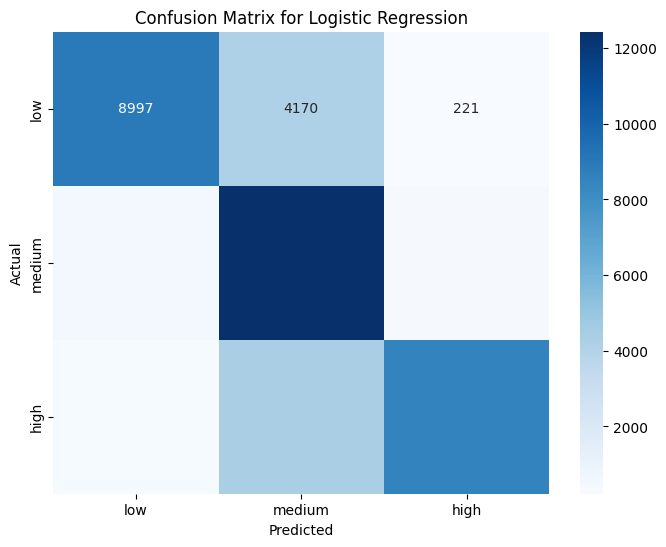

Review: "I really love this product! I tend to have issues with sunscreens feeling greasy on my face and making me look oily and shiny, but this spf fixed that issue. While I originally bought it to be my main sunscreen, I found it layers beautifully with the cream sunscreen I already had, which provides me with more security because I know It will actually protect me from the sun. The formula is very soft and it easily eliminates any shininess left behind by my cream sunscreen. It makes my face look great and I don’t find myself having sensory issues with my sunscreen anymore. I pair this with the hero brand sunscreen if anyone was wondering. Definitely try this out I totally recommend it"
Predicted Sentiment: high

Review: "The packaging is not functional!! I couldn’t use the product and had to throw it out since it was well past the return window. I wasted my money on this product, and I am super disappointed because I was actually looking forward to using it."
Predicted Sentiment: 

In [80]:
# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial',
                            solver='lbfgs')
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = logreg.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log, target_names=['low', 'medium', 'high']))

# Compute the confusion matrix
# Ensure that labels here (e.g., -1, 0, 1) match the encoding in your y data
labels = [-1, 0, 1]  # Ensure these match your label encoding
conf_matrix = confusion_matrix(y_test, y_pred_log, labels=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['low', 'medium', 'high'], 
            yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Predict sentiment for sample reviews
sample_reviews_log = [
    "I really love this product! I tend to have issues with sunscreens feeling greasy on my face and making me look oily and shiny, but this spf fixed that issue. While I originally bought it to be my main sunscreen, I found it layers beautifully with the cream sunscreen I already had, which provides me with more security because I know It will actually protect me from the sun. The formula is very soft and it easily eliminates any shininess left behind by my cream sunscreen. It makes my face look great and I don’t find myself having sensory issues with my sunscreen anymore. I pair this with the hero brand sunscreen if anyone was wondering. Definitely try this out I totally recommend it",
    "The packaging is not functional!! I couldn’t use the product and had to throw it out since it was well past the return window. I wasted my money on this product, and I am super disappointed because I was actually looking forward to using it.",
    "I’ve worked so hard to have clear skin for the past 2 years, and I take my spf game very seriously. I bought this thinking it would be my new go to when on the run or flying. I reapplied as the instructions said, making sure to blot before applying so that my pores wouldn’t get clogged. The way the product is distributed could be better but it’s a good product for when you’re on the run. But unfortunately, this product made my skin break out like I have never before.",
    "The powder itself is really nice and a great way to add spf throughout the day. The packaging leaves a lot to be desired. The brush doesn’t distribute well or evenly. It would be better as a separate brush and loose or pressed powder. I’d recommend buying the refills from the Supergoop website and filling your own pot."
]

# Transform the sample reviews using the same TF-IDF vectorizer
sample_reviews_log_tfidf = tfidf_vectorizer.transform(sample_reviews_log)

# Predict the sentiment of the sample reviews
sample_predictions_log = logreg.predict(sample_reviews_log_tfidf)

# Map the numerical predictions to sentiment labels
sentiment_labels = {-1: 'low', 0: 'medium', 1: 'high'}  # Adjust labels based on your encoding
predicted_sentiments = [sentiment_labels.get(pred, 'unknown') for pred in sample_predictions_log]

# Print the results
for review, sentiment in zip(sample_reviews_log, predicted_sentiments):
    print(f"Review: \"{review}\"")
    print(f"Predicted Sentiment: {sentiment}")
    print()


In [82]:
# Perform cross-validation
cv_scores_log = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores_log}")
print(f"Mean Cross-Validation Accuracy: {cv_scores_log.mean()}")

Cross-Validation Accuracy Scores: [0.74487447 0.746565   0.74735631 0.74548594 0.74573772]
Mean Cross-Validation Accuracy: 0.7460038846126178


The Logistic Regression model shows an overall accuracy of 75%. Reviewing the class performance:

Low Class: High Precision of 0.91.

Medium Class: Moderate Precision of 0.59.

High Class: High Precision of 0.94.

Overall Model Performance: The mean cross-validation accuracy of 0.746 suggests that while the model performs reasonably well on average, it may not be consistent across different subsets of the data. This variability can be due to issues like overfitting or underfitting, particularly for specific classes.

#### Recommendations:
To address these issues, consider adjusting class weights to improve performance on the 'medium' class, using resampling techniques to balance class distributions, or exploring more advanced models or feature engineering to better capture class-specific characteristics.

-------------------------------------------------------------------------------

## (b) Decision Tree

Decision Tree Classification Report:
              precision    recall  f1-score   support

         low       0.98      0.73      0.84     13388
      medium       0.64      1.00      0.78     13325
        high       1.00      0.69      0.82     13233

    accuracy                           0.81     39946
   macro avg       0.87      0.81      0.81     39946
weighted avg       0.87      0.81      0.81     39946



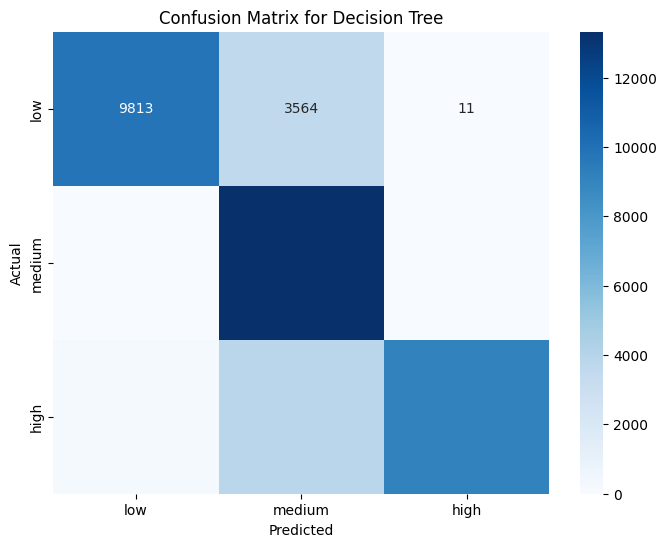

Review: "I really love this product! I tend to have issues with sunscreens feeling greasy on my face and making me look oily and shiny, but this spf fixed that issue. While I originally bought it to be my main sunscreen, I found it layers beautifully with the cream sunscreen I already had, which provides me with more security because I know It will actually protect me from the sun. The formula is very soft and it easily eliminates any shininess left behind by my cream sunscreen. It makes my face look great and I don’t find myself having sensory issues with my sunscreen anymore. I pair this with the hero brand sunscreen if anyone was wondering. Definitely try this out I totally recommend it"
Predicted Sentiment: high

Review: "The packaging is not functional!! I couldn’t use the product and had to throw it out since it was well past the return window. I wasted my money on this product, and I am super disappointed because I was actually looking forward to using it."
Predicted Sentiment: 

In [83]:
# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)  # Set random_state for reproducibility
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dec = decision_tree.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dec, target_names=['low', 'medium', 'high']))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dec, labels=[-1, 0, 1])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['low', 'medium', 'high'], 
            yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Predict sentiment for sample reviews
# Sample reviews for prediction
sample_reviews_dec = [
    "I really love this product! I tend to have issues with sunscreens feeling greasy on my face and making me look oily and shiny, but this spf fixed that issue. While I originally bought it to be my main sunscreen, I found it layers beautifully with the cream sunscreen I already had, which provides me with more security because I know It will actually protect me from the sun. The formula is very soft and it easily eliminates any shininess left behind by my cream sunscreen. It makes my face look great and I don’t find myself having sensory issues with my sunscreen anymore. I pair this with the hero brand sunscreen if anyone was wondering. Definitely try this out I totally recommend it",
    "The packaging is not functional!! I couldn’t use the product and had to throw it out since it was well past the return window. I wasted my money on this product, and I am super disappointed because I was actually looking forward to using it.",
    "I’ve worked so hard to have clear skin for the past 2 years, and I take my spf game very seriously. I bought this thinking it would be my new go to when on the run or flying. I reapplied as the instructions said, making sure to blot before applying so that my pores wouldn’t get clogged. The way the product is distributed could be better but it’s a good product for when you’re on the run. But unfortunately, this product made my skin break out like I have never before.",
    "The powder itself is really nice and a great way to add spf throughout the day. The packaging leaves a lot to be desired. The brush doesn’t distribute well or evenly. It would be better as a separate brush and loose or pressed powder. I’d recommend buying the refills from the Supergoop website and filling your own pot."
]

# Transform the sample reviews using the same TF-IDF vectorizer
sample_reviews_tfidf = tfidf_vectorizer.transform(sample_reviews_dec)

# Predict the sentiment of the sample reviews
sample_predictions = decision_tree.predict(sample_reviews_tfidf)

# Map the numerical predictions to sentiment labels
sentiment_labels = { -1: 'low', 0: 'medium', 1: 'high' }
predicted_sentiments = [sentiment_labels[pred] for pred in sample_predictions]

# Print the results
for review, sentiment in zip(sample_reviews_dec, predicted_sentiments):
    print(f"Review: \"{review}\"")
    print(f"Predicted Sentiment: {sentiment}")
    print()


In [84]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores_dec = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores_dec}")
print(f"Mean Cross-Validation Accuracy: {cv_scores_dec.mean()}")


Cross-Validation Accuracy Scores: [0.81132028 0.80816602 0.81079457 0.80936287 0.81181625]
Mean Cross-Validation Accuracy: 0.8102920000957358


The Decision Tree model achieves an accuracy of 79%, demonstrating good performance overall. Reviewing the class performance:

Low Class: High Precision of 0.98.

Medium Class: Moderate Precision of 0.64.

High Class: Perfect Precision of 1.00.

The model struggles with the 'medium' class.

#### Recommendations: 
To address these issues, consider pruning the decision tree to reduce overfitting and improve generalization across all classes. Implementing techniques such as balanced class weights or ensemble methods like Random Forest could enhance performance for classes with lower recall. Additionally, tuning hyperparameters like tree depth and minimum samples per leaf can help achieve a better balance between precision and recall across all classes

-------------------------------------------------------------------------------

## (c) Random Forest

Random Forest Classification Report:
              precision    recall  f1-score   support

         low       1.00      0.73      0.85     13388
      medium       0.65      1.00      0.79     13325
        high       1.00      0.72      0.84     13233

    accuracy                           0.82     39946
   macro avg       0.88      0.82      0.82     39946
weighted avg       0.88      0.82      0.82     39946



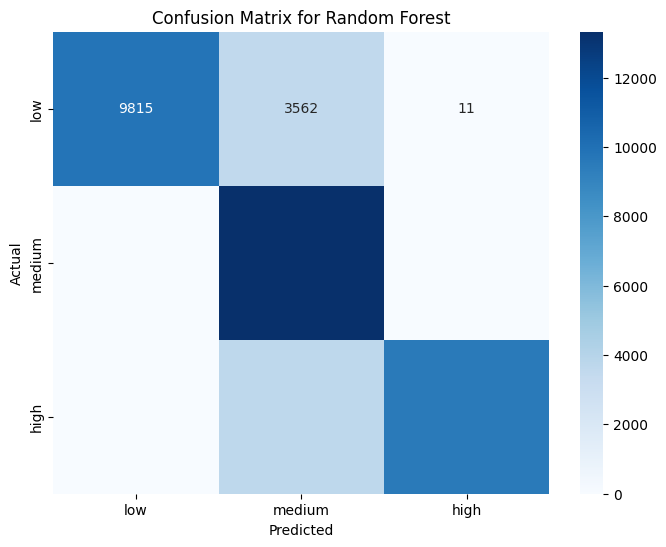

Review: "I really love this product! I tend to have issues with sunscreens feeling greasy on my face and making me look oily and shiny, but this spf fixed that issue. While I originally bought it to be my main sunscreen, I found it layers beautifully with the cream sunscreen I already had, which provides me with more security because I know It will actually protect me from the sun. The formula is very soft and it easily eliminates any shininess left behind by my cream sunscreen. It makes my face look great and I donâ€™t find myself having sensory issues with my sunscreen anymore. I pair this with the hero brand sunscreen if anyone was wondering. Definitely try this out I totally recommend it"
Predicted Sentiment: high

Review: "The packaging is not functional!! I couldnâ€™t use the product and had to throw it out since it was well past the return window. I wasted my money on this product, and I am super disappointed because I was actually looking forward to using it."
Predicted Sentime

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rand = random_forest.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rand, target_names=['low', 'medium', 'high']))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rand, labels=[-1, 0, 1])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['low', 'medium', 'high'], 
            yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()


# Predict sentiment for sample reviews
# Sample reviews for prediction
sample_reviews_rand = [
    "I really love this product! I tend to have issues with sunscreens feeling greasy on my face and making me look oily and shiny, but this spf fixed that issue. While I originally bought it to be my main sunscreen, I found it layers beautifully with the cream sunscreen I already had, which provides me with more security because I know It will actually protect me from the sun. The formula is very soft and it easily eliminates any shininess left behind by my cream sunscreen. It makes my face look great and I donâ€™t find myself having sensory issues with my sunscreen anymore. I pair this with the hero brand sunscreen if anyone was wondering. Definitely try this out I totally recommend it",
    "The packaging is not functional!! I couldnâ€™t use the product and had to throw it out since it was well past the return window. I wasted my money on this product, and I am super disappointed because I was actually looking forward to using it.",
    "Iâ€™ve worked so hard to have clear skin for the past 2 years, and I take my spf game very seriously. I bought this thinking it would be my new go to when on the run or flying. I reapplied as the instructions said, making sure to blot before applying so that my pores wouldnâ€™t get clogged. The way the product is distributed could be better but itâ€™s a good product for when youâ€™re on the run. But unfortunately, this product made my skin break out like I have never before.",
    "The powder itself is really nice and a great way to add spf throughout the day. The packaging leaves a lot to be desired. The brush doesnâ€™t distribute well or evenly. It would be better as a separate brush and loose or pressed powder. Iâ€™d recommend buying the refills from the Supergoop website and filling your own pot."
]

# Transform the sample reviews using the same TF-IDF vectorizer
sample_reviews_rand_tfidf = tfidf_vectorizer.transform(sample_reviews_rand)

# Predict the sentiment of the sample reviews
sample_predictions_rand = random_forest.predict(sample_reviews_rand_tfidf)

# Map the numerical predictions to sentiment labels
sentiment_labels = { -1: 'low', 0: 'medium', 1: 'high' }
predicted_sentiments = [sentiment_labels[pred] for pred in sample_predictions_rand]

# Print the results
for review, sentiment in zip(sample_reviews_rand, predicted_sentiments):
    print(f"Review: \"{review}\"")
    print(f"Predicted Sentiment: {sentiment}")
    print()


In [87]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores_rand = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores_rand}")
print(f"Mean Cross-Validation Accuracy: {cv_scores_rand.mean()}")

Cross-Validation Accuracy Scores: [0.81928103 0.8161518  0.82020728 0.81774941 0.82172988]
Mean Cross-Validation Accuracy: 0.819023879633926


The Random Forest model stands out with the highest accuracy of 0.82. Reviewing the class performance:

Low Class: Perfect precision of 1.00.

Medium Class: Moderate Precision of 0.65.

High Class: Perfect Precision of 1.00.

The model struggles with the 'medium' class.

#### Recommendations:
To improve performance, consider fine-tuning hyperparameters such as the number of trees, maximum depth, and minimum samples per leaf to enhance balance between precision and recall across all classes. Techniques like adjusting class weights or applying different resampling strategies could also help address the trade-offs and improve the model's ability to capture more instances of each class. Additionally, exploring model ensembling methods or combining Random Forest with other algorithms may provide more robust performance

-------------------------------------------------------------------------------

## (d) XGBoost

XGBoost Classification Report:
              precision    recall  f1-score   support

         low       0.94      0.69      0.79     13388
      medium       0.62      0.96      0.75     13325
        high       0.94      0.67      0.78     13233

    accuracy                           0.77     39946
   macro avg       0.83      0.77      0.78     39946
weighted avg       0.83      0.77      0.78     39946



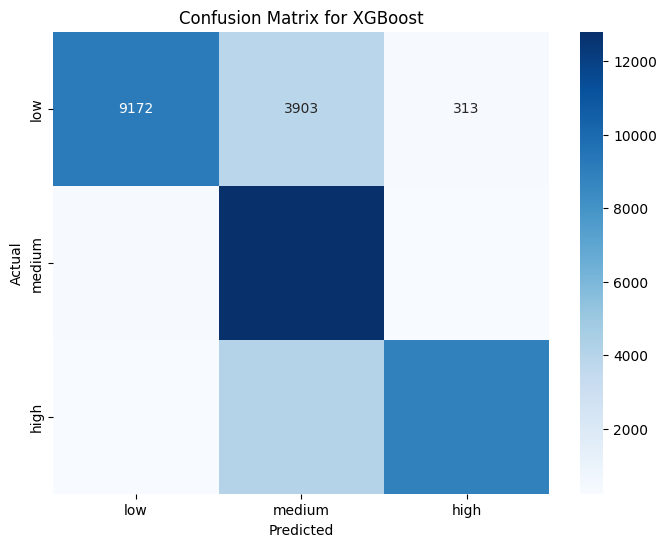

Review: "I really love this product! I tend to have issues with sunscreens feeling greasy on my face and making me look oily and shiny, but this spf fixed that issue. While I originally bought it to be my main sunscreen, I found it layers beautifully with the cream sunscreen I already had, which provides me with more security because I know It will actually protect me from the sun. The formula is very soft and it easily eliminates any shininess left behind by my cream sunscreen. It makes my face look great and I don’t find myself having sensory issues with my sunscreen anymore. I pair this with the hero brand sunscreen if anyone was wondering. Definitely try this out I totally recommend it"
Predicted Sentiment: low

Review: "The packaging is not functional!! I couldn’t use the product and had to throw it out since it was well past the return window. I wasted my money on this product, and I am super disappointed because I was actually looking forward to using it."
Predicted Sentiment: m

In [88]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Ensure the label mapping for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
y_train_xgboost = y_train.map(label_mapping)
y_test_xgboost = y_test.map(label_mapping)

# Initialize and train the XGBoost model
xgboost_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgboost_model.fit(X_train, y_train_xgboost)

# Make predictions on the test set
y_pred_xgboost = xgboost_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Classification Report:")
print(classification_report(y_test_xgboost, y_pred_xgboost, target_names=['low', 'medium', 'high']))

# Compute the confusion matrix
conf_matrix_xgboost = confusion_matrix(y_test_xgboost, y_pred_xgboost, labels=[0, 1, 2])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgboost, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['low', 'medium', 'high'], 
            yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

# Predict sentiment for sample reviews
sample_reviews_xgboost = [
    "I really love this product! I tend to have issues with sunscreens feeling greasy on my face and making me look oily and shiny, but this spf fixed that issue. While I originally bought it to be my main sunscreen, I found it layers beautifully with the cream sunscreen I already had, which provides me with more security because I know It will actually protect me from the sun. The formula is very soft and it easily eliminates any shininess left behind by my cream sunscreen. It makes my face look great and I don’t find myself having sensory issues with my sunscreen anymore. I pair this with the hero brand sunscreen if anyone was wondering. Definitely try this out I totally recommend it",
    "The packaging is not functional!! I couldn’t use the product and had to throw it out since it was well past the return window. I wasted my money on this product, and I am super disappointed because I was actually looking forward to using it.",
    "I’ve worked so hard to have clear skin for the past 2 years, and I take my spf game very seriously. I bought this thinking it would be my new go to when on the run or flying. I reapplied as the instructions said, making sure to blot before applying so that my pores wouldn’t get clogged. The way the product is distributed could be better but it’s a good product for when you’re on the run. But unfortunately, this product made my skin break out like I have never before.",
    "The powder itself is really nice and a great way to add spf throughout the day. The packaging leaves a lot to be desired. The brush doesn’t distribute well or evenly. It would be better as a separate brush and loose or pressed powder. I’d recommend buying the refills from the Supergoop website and filling your own pot."
]

# Transform the sample reviews using the same TF-IDF vectorizer
sample_reviews_xgboost_tfidf = tfidf_vectorizer.transform(sample_reviews_xgboost)

# Predict the sentiment of the sample reviews
sample_predictions_xgboost = xgboost_model.predict(sample_reviews_xgboost_tfidf)

# Map the numerical predictions to sentiment labels
sentiment_labels = {0: 'medium', 1: 'high', 2: 'low'}
predicted_sentiments_xgboost = [sentiment_labels[pred] for pred in sample_predictions_xgboost]

# Print the results
for review, sentiment in zip(sample_reviews_xgboost, predicted_sentiments_xgboost):
    print(f"Review: \"{review}\"")
    print(f"Predicted Sentiment: {sentiment}")
    print()


In [89]:
# Apply label mapping to the entire dataset for cross-validation
y_mapped = y.map(label_mapping)

# Perform cross-validation
cv_scores_xgboost = cross_val_score(xgboost_model, X, y_mapped, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores_xgboost}")
print(f"Mean Cross-Validation Accuracy: {cv_scores_xgboost.mean()}")

Cross-Validation Accuracy Scores: [0.7690382  0.76796175 0.77131628 0.7709851  0.77536613]
Mean Cross-Validation Accuracy: 0.7709334919703247


The XGBoost model shows an accuracy of 0.78 and performs reasonably well overall. Reviewing the class performance:

Low Class: High Precision of 0.86.

Medium Class: Moderate precision of 0.56.

High Class: High Precision of 0.88.

The model struggles with the 'medium' class.

#### Recommendations:
To address these issues, consider tuning hyperparameters such as the learning rate, maximum depth, and number of boosting rounds to find a better balance between precision and recall. Adjusting class weights or using techniques like stratified sampling during training may also improve performance on classes with lower recall. Additionally, exploring ensemble methods or combining XGBoost with other algorithms could provide a more balanced and robust model.

-------------------------------------------------------------------------------


## (e) Naive Bayes

Naive Bayes Classification Report:
              precision    recall  f1-score   support

         low       0.86      0.62      0.72     13388
      medium       0.56      0.87      0.68     13325
        high       0.88      0.63      0.74     13233

    accuracy                           0.71     39946
   macro avg       0.76      0.71      0.71     39946
weighted avg       0.76      0.71      0.71     39946



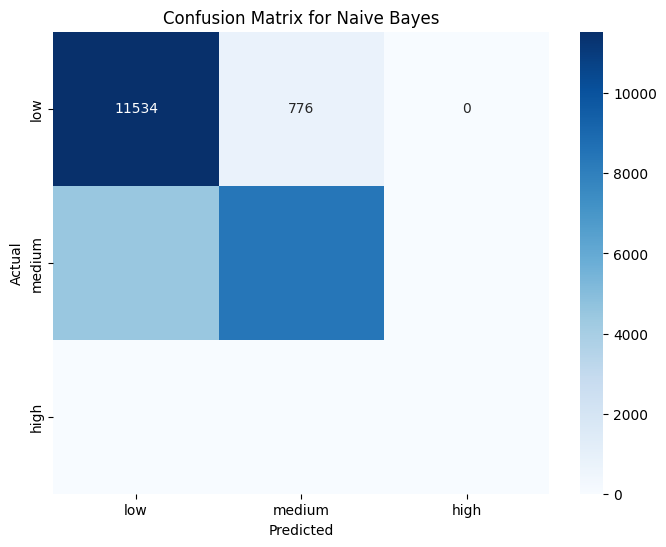

Review: "I really love this product! I tend to have issues with sunscreens feeling greasy on my face and making me look oily and shiny, but this spf fixed that issue. While I originally bought it to be my main sunscreen, I found it layers beautifully with the cream sunscreen I already had, which provides me with more security because I know It will actually protect me from the sun. The formula is very soft and it easily eliminates any shininess left behind by my cream sunscreen. It makes my face look great and I don’t find myself having sensory issues with my sunscreen anymore. I pair this with the hero brand sunscreen if anyone was wondering. Definitely try this out I totally recommend it"
Predicted Sentiment: high

Review: "The packaging is not functional!! I couldn’t use the product and had to throw it out since it was well past the return window. I wasted my money on this product, and I am super disappointed because I was actually looking forward to using it."
Predicted Sentiment: 

In [90]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['low', 'medium', 'high']))

# Compute the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb, labels=[0, 1, 2])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['low', 'medium', 'high'], 
            yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# Predict sentiment for sample reviews
# Sample reviews for prediction
sample_reviews_nb = [
    "I really love this product! I tend to have issues with sunscreens feeling greasy on my face and making me look oily and shiny, but this spf fixed that issue. While I originally bought it to be my main sunscreen, I found it layers beautifully with the cream sunscreen I already had, which provides me with more security because I know It will actually protect me from the sun. The formula is very soft and it easily eliminates any shininess left behind by my cream sunscreen. It makes my face look great and I don’t find myself having sensory issues with my sunscreen anymore. I pair this with the hero brand sunscreen if anyone was wondering. Definitely try this out I totally recommend it",
    "The packaging is not functional!! I couldn’t use the product and had to throw it out since it was well past the return window. I wasted my money on this product, and I am super disappointed because I was actually looking forward to using it.",
    "I’ve worked so hard to have clear skin for the past 2 years, and I take my spf game very seriously. I bought this thinking it would be my new go to when on the run or flying. I reapplied as the instructions said, making sure to blot before applying so that my pores wouldn’t get clogged. The way the product is distributed could be better but it’s a good product for when you’re on the run. But unfortunately, this product made my skin break out like I have never before.",
    "The powder itself is really nice and a great way to add spf throughout the day. The packaging leaves a lot to be desired. The brush doesn’t distribute well or evenly. It would be better as a separate brush and loose or pressed powder. I’d recommend buying the refills from the Supergoop website and filling your own pot."
]

# Transform the sample reviews using the same TF-IDF vectorizer
sample_reviews_nb_tfidf = tfidf_vectorizer.transform(sample_reviews_nb)

# Predict the sentiment of the sample reviews
sample_predictions_nb = nb_model.predict(sample_reviews_nb_tfidf)

# Map the numerical predictions to sentiment labels
sentiment_labels = {-1: 'low', 0: 'medium', 1: 'high'}
predicted_sentiments_nb = [sentiment_labels[pred] for pred in sample_predictions_nb]

# Print the results
for review, sentiment in zip(sample_reviews_nb, predicted_sentiments_nb):
    print(f"Review: \"{review}\"")
    print(f"Predicted Sentiment: {sentiment}")
    print()


In [91]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores_nb = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores_nb}")
print(f"Mean Cross-Validation Accuracy: {cv_scores_nb.mean()}")


Cross-Validation Accuracy Scores: [0.70813098 0.70990838 0.7111851  0.71210414 0.71275504]
Mean Cross-Validation Accuracy: 0.7108167268771911


The Naive Bayes model has an accuracy of 77%. Reviewing the class performance:

Low Class: High Precision of 0.94.

Medium Class: Moderate Precision of 0.62.

High Class: High Precision of 0.94.

The model struggles with the 'medium' class.

#### Recommendations:
To improve performance, consider using a more complex model that can handle feature dependencies better than Naive Bayes, such as ensemble methods or support vector machines. Implementing techniques like feature scaling or engineering may also enhance model effectiveness. Additionally, addressing class imbalance through resampling methods or adjusting class weights could help improve recall, especially for the 'medium' class.


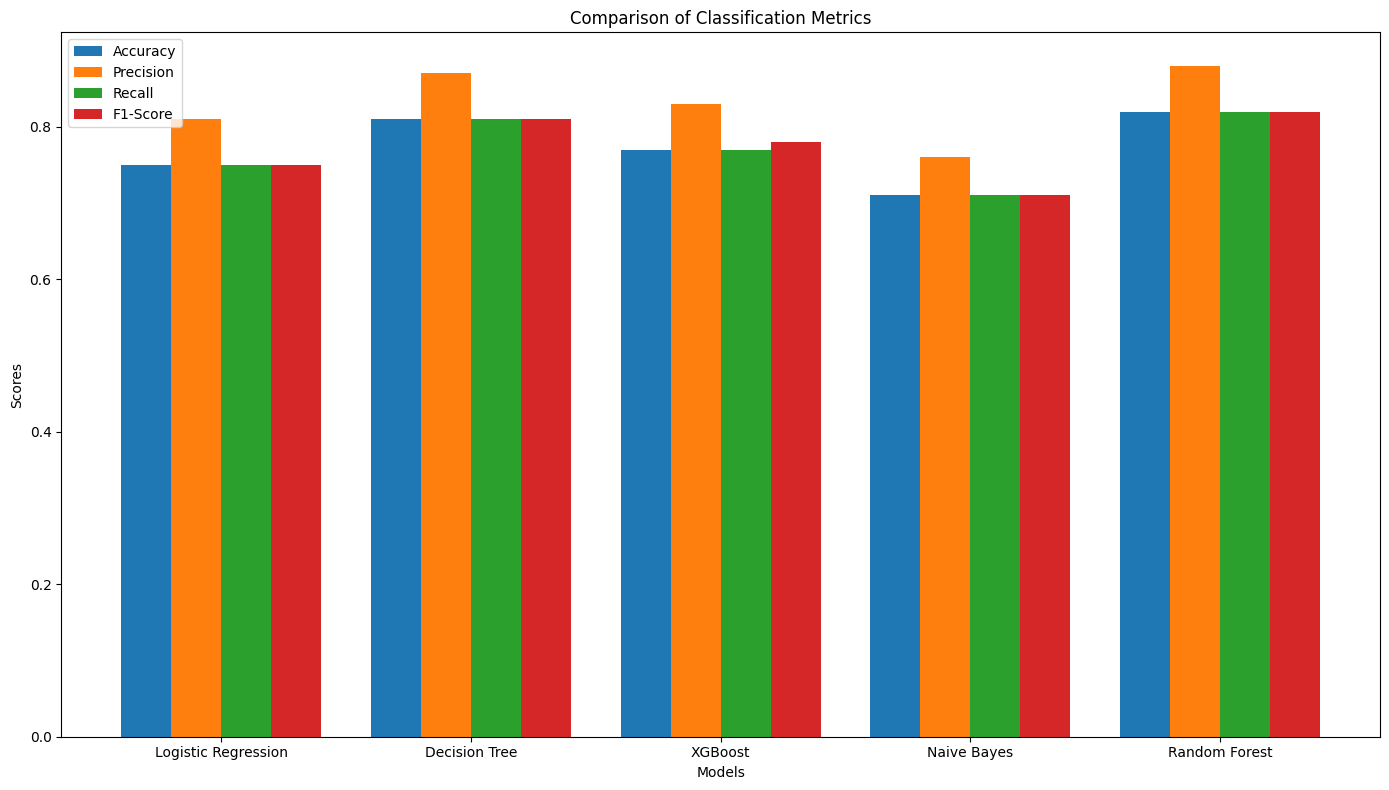

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
models = ['Logistic Regression', 'Decision Tree', 'XGBoost', 'Naive Bayes', 'Random Forest']

# Model metrics values
# These values come from the classification reports provided
values = {
    'Logistic Regression': [0.75, 0.81, 0.75, 0.75],
    'Decision Tree': [0.81, 0.87, 0.81, 0.81],
    'XGBoost': [0.77, 0.83, 0.77, 0.78],
    'Random Forest': [0.82, 0.88, 0.82, 0.82],
    'Naive Bayes': [0.71, 0.76, 0.71, 0.71]
    
}

# Convert the metrics into a format suitable for plotting
x = np.arange(len(models))  # the model locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plot each metric
for i, metric in enumerate(metrics):
    metric_values = [values[model][i] for model in models]
    ax.bar(x + i * width, metric_values, width, label=metric)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classification Metrics')
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()


# Model Evaluation Prior to Hyperparameter Tuning
Among the models evaluated, the Random Forest classifier demonstrates the best performance. It achieves the highest accuracy of 0.82 on the test set and a mean cross-validation accuracy of 0.827. Its classification report shows strong metrics across all classes, with a balanced trade-off between precision and recall.

-------------------------------------------------------------------------------

# Hyperparameter Tuning

## (a) Logistic Regression Hyperparameter Tuning

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Define the parameter distribution for Logistic Regression
param_distributions = {
    'C': uniform(0.001, 10),  # The range for C is from 0.001 to 10
    'penalty': ['l1', 'l2', 'elasticnet'],   # Regularization types
    'solver': ['liblinear', 'saga'],         # Solvers: 'liblinear' is for small datasets, 'saga' supports 'l1' and 'l2'
    'class_weight': ['balanced']             # Fixed the syntax error
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial',
                            solver='saga')  # Solver 'saga' is recommended for larger datasets

# Initialize RandomizedSearchCV with reduced number of iterations
random_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_distributions, 
                                    n_iter=10,  # Reduced number of iterations for faster tuning
                                    cv=5, 
                                    scoring='accuracy', 
                                    n_jobs=-1, 
                                    random_state=42, 
                                    verbose=2)  # Verbose for more information during tuning

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Use the best model for predictions
best_logreg_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_log = best_logreg_model.predict(X_test)

# Evaluate the Logistic Regression model with best parameters
print("Logistic Regression Classification Report with Best Parameters:")
print(classification_report(y_test, y_pred_log, target_names=['low', 'medium', 'high']))

# Compute the confusion matrix
labels = np.unique(y_test)  # Use unique labels from y_test
conf_matrix_log = confusion_matrix(y_test, y_pred_log, labels=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, 
            yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression with Best Parameters')
plt.show()


Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

## Decision Tree Hyperparameter Tuning

In [ ]:
# Hyper-parameter Tuning for Decision Tree

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions for Decision Tree
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, 50, 80, 100, 120, 150, 180, 200, 230, 250],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50, 100] 
}

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_distributions, 
                                    n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Use the best model for predictions
best_decision_tree_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_dec = best_decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model with best parameters
print("Decision Tree Classification Report with Best Parameters:")
print(classification_report(y_test, y_pred_dec, target_names=['low', 'medium', 'high']))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dec, labels=[-1, 0, 1])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['low', 'medium', 'high'], 
            yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree with Best Parameters')
plt.show()

# Feature importance analysis
importances = best_decision_tree_model.feature_importances_
print("Feature importances:", importances)


## (c) Random Forest Hyperparameter Tuning

C:\Users\angel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\angel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\angel\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\angel\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\angel\anaconda3\Lib\site-package

Best parameters found:  {'class_weight': 'balanced', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 39}
Best cross-validation score:  0.5621034457952665
Random Forest Classification Report with Best Parameters:
              precision    recall  f1-score   support

         low       0.70      0.47      0.56     13388
      medium       0.46      0.66      0.54     13325
        high       0.64      0.57      0.60     13233

    accuracy                           0.57     39946
   macro avg       0.60      0.57      0.57     39946
weighted avg       0.60      0.57      0.57     39946



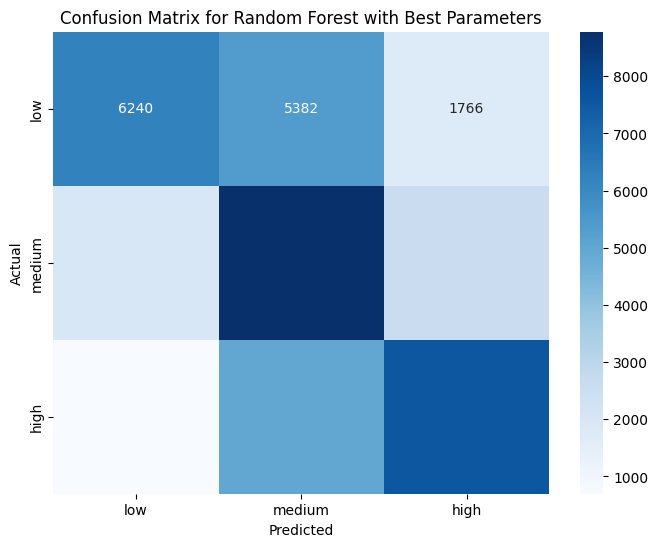

In [96]:
# Hyper-parameter tuning for Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter distribution for Random Forest
param_distributions = {
    'n_estimators': randint(1, 50),               # Number of trees in the forest
    'max_depth': randint(1, 10),                  # Maximum depth of the tree
    'min_samples_split': randint(1, 10),           # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),            # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', None] # Number of features to consider when looking for the best split
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, 
                                    param_distributions=param_distributions,
                                    n_iter=10,                      # Number of parameter settings to sample
                                    cv=5,                          # Number of cross-validation folds
                                    scoring='accuracy',            # Evaluation metric
                                    n_jobs=-1,                      # Number of jobs to run in parallel
                                    random_state=42)                # Seed for reproducibility

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Use the best model for predictions
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model with the best parameters
print("Random Forest Classification Report with Best Parameters:")
print(classification_report(y_test, y_pred_rf, target_names=['low', 'medium', 'high']))

# Compute the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf, labels=[-1, 0, 1])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['low', 'medium', 'high'], 
            yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest with Best Parameters')
plt.show()


## (d) XGBoost Hyperparameter Tuning

In [ ]:
# Hyper-parameter Tuning for XGBoost

import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

# Define the parameter distribution for XGBoost with limited range
param_distributions = {
    'n_estimators': randint(1,10),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 7),
    'min_child_weight': randint(1, 5),
    'subsample': uniform(0.6, 0.3),
    'colsample_bytree': uniform(0.6, 0.3),
    'gamma': uniform(0, 0.2)
}

# Initialize the XGBoost model
xgboost_model = xgb.XGBClassifier(random_state=42)

# Initialize RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(estimator=xgboost_model, param_distributions=param_distributions, 
                                    n_iter=30,  # Reduced number of iterations
                                    cv=5, 
                                    scoring='accuracy', 
                                    n_jobs=-1, 
                                    verbose=2,  # Increased verbosity for debugging
                                    random_state=42)

# Create a smaller subset of data for quicker tuning
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train_xgboost, test_size=0.8, random_state=42)

# Fit RandomizedSearchCV on the smaller subset
random_search.fit(X_train_small, y_train_small)

# Print best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Use the best model for predictions
best_xgboost_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_xgboost = best_xgboost_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Classification Report with Best Parameters:")
print(classification_report(y_test_xgboost, y_pred_xgboost, target_names=['low', 'medium', 'high']))

# Compute the confusion matrix
conf_matrix_xgboost = confusion_matrix(y_test_xgboost, y_pred_xgboost, labels=[0, 1, 2])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgboost, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['low', 'medium', 'high'], 
            yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost with Best Parameters')
plt.show()


## (e) Naive Bayes Hyperparameter Tuning

In [95]:
# Hyper-parameter tuning for Naive Bayes.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distribution for alpha
param_distributions = {
    'alpha': uniform(0.1, 10.0)  # Uniform distribution from 0.1 to 10.0
}

# Initialize the MultinomialNB model
nb_model = MultinomialNB()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=nb_model, param_distributions=param_distributions, 
                                    n_iter=300, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Use the best model for predictions
best_nb_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_nb = best_nb_model.predict(X_test)

# Evaluate the Naive Bayes model
print("Naive Bayes Classification Report with Best Parameters:")
print(classification_report(y_test, y_pred_nb, target_names=['low', 'medium', 'high']))

# Compute the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb, labels=[0, 1, 2])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['low', 'medium', 'high'], 
            yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes with Best Parameters')
plt.show()


KeyboardInterrupt: 

### Let's test the selected model (Random Forest) using the Validation Dataset
To get an unbiased evaluation of the model's performance. 

Random Forest Classification Report (Test Set):
              precision    recall  f1-score   support

         low       1.00      0.73      0.85     13388
      medium       0.65      1.00      0.79     13325
        high       1.00      0.72      0.84     13233

    accuracy                           0.82     39946
   macro avg       0.88      0.82      0.82     39946
weighted avg       0.88      0.82      0.82     39946



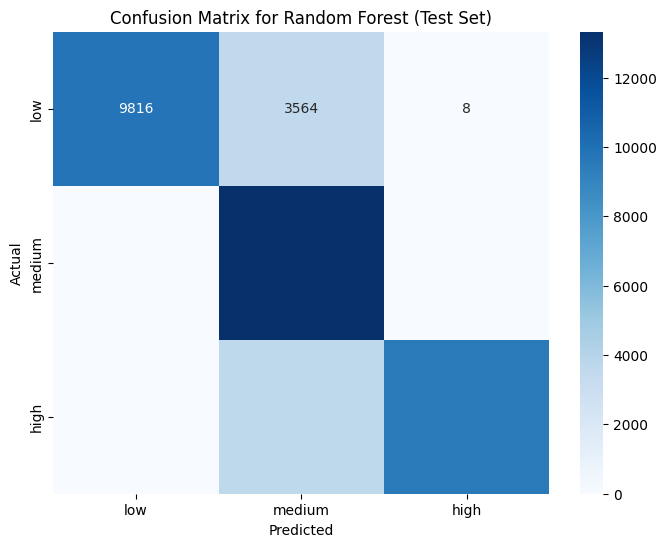

Random Forest Classification Report (Validation Set):
              precision    recall  f1-score   support

         low       1.00      0.74      0.85      6902
      medium       0.65      1.00      0.79      6906
        high       1.00      0.72      0.84      6964

    accuracy                           0.82     20772
   macro avg       0.88      0.82      0.83     20772
weighted avg       0.88      0.82      0.83     20772



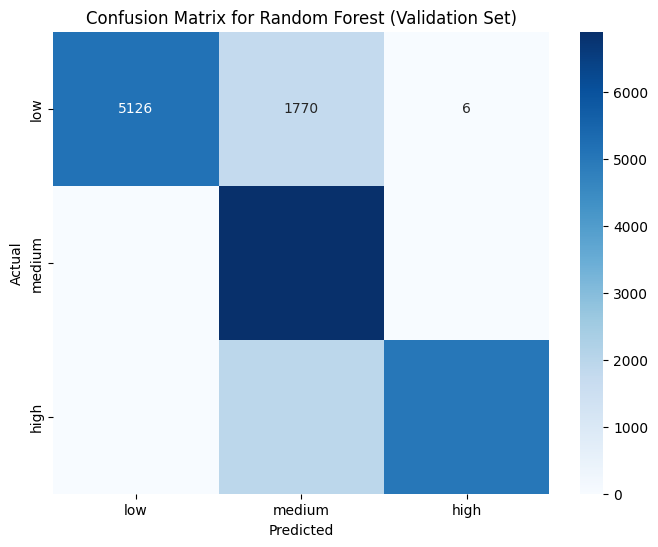

Review: "I really love this product! I tend to have issues with sunscreens feeling greasy on my face and making me look oily and shiny, but this spf fixed that issue. While I originally bought it to be my main sunscreen, I found it layers beautifully with the cream sunscreen I already had, which provides me with more security because I know It will actually protect me from the sun. The formula is very soft and it easily eliminates any shininess left behind by my cream sunscreen. It makes my face look great and I donâ€™t find myself having sensory issues with my sunscreen anymore. I pair this with the hero brand sunscreen if anyone was wondering. Definitely try this out I totally recommend it"
Predicted Sentiment: high

Review: "The packaging is not functional!! I couldnâ€™t use the product and had to throw it out since it was well past the return window. I wasted my money on this product, and I am super disappointed because I was actually looking forward to using it."
Predicted Sentime

In [97]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=64, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = random_forest.predict(X_test)

# Evaluate the Random Forest model on the test set
print("Random Forest Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test, target_names=['low', 'medium', 'high']))

# Compute and plot confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test, labels=[-1, 0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['low', 'medium', 'high'], 
            yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest (Test Set)')
plt.show()

# Make predictions on the validation set
y_pred_val = random_forest.predict(X_val)

# Evaluate the Random Forest model on the validation set
print("Random Forest Classification Report (Validation Set):")
print(classification_report(y_val, y_pred_val, target_names=['low', 'medium', 'high']))

# Compute and plot confusion matrix for the validation set
conf_matrix_val = confusion_matrix(y_val, y_pred_val, labels=[-1, 0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['low', 'medium', 'high'], 
            yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest (Validation Set)')
plt.show()

# Predict sentiment for sample reviews
# Sample reviews for prediction
sample_reviews_rand = [
    "I really love this product! I tend to have issues with sunscreens feeling greasy on my face and making me look oily and shiny, but this spf fixed that issue. While I originally bought it to be my main sunscreen, I found it layers beautifully with the cream sunscreen I already had, which provides me with more security because I know It will actually protect me from the sun. The formula is very soft and it easily eliminates any shininess left behind by my cream sunscreen. It makes my face look great and I donâ€™t find myself having sensory issues with my sunscreen anymore. I pair this with the hero brand sunscreen if anyone was wondering. Definitely try this out I totally recommend it",
    "The packaging is not functional!! I couldnâ€™t use the product and had to throw it out since it was well past the return window. I wasted my money on this product, and I am super disappointed because I was actually looking forward to using it.",
    "Iâ€™ve worked so hard to have clear skin for the past 2 years, and I take my spf game very seriously. I bought this thinking it would be my new go to when on the run or flying. I reapplied as the instructions said, making sure to blot before applying so that my pores wouldnâ€™t get clogged. The way the product is distributed could be better but itâ€™s a good product for when youâ€™re on the run. But unfortunately, this product made my skin break out like I have never before.",
    "The powder itself is really nice and a great way to add spf throughout the day. The packaging leaves a lot to be desired. The brush doesnâ€™t distribute well or evenly. It would be better as a separate brush and loose or pressed powder. Iâ€™d recommend buying the refills from the Supergoop website and filling your own pot."
]

# Transform the sample reviews using the same TF-IDF vectorizer
sample_reviews_rand_tfidf = tfidf_vectorizer.transform(sample_reviews_rand)

# Predict the sentiment of the sample reviews
sample_predictions_rand = random_forest.predict(sample_reviews_rand_tfidf)

# Map the numerical predictions to sentiment labels
sentiment_labels = { -1: 'low', 0: 'medium', 1: 'high' }
predicted_sentiments = [sentiment_labels[pred] for pred in sample_predictions_rand]

# Print the results for sample reviews
for review, sentiment in zip(sample_reviews_rand, predicted_sentiments):
    print(f"Review: \"{review}\"")
    print(f"Predicted Sentiment: {sentiment}")
    print()


C:\Users\angel\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classification Report (Test Set):
              precision    recall  f1-score   support

         low       0.70      0.47      0.56     13388
      medium       0.46      0.66      0.54     13325
        high       0.64      0.57      0.60     13233

    accuracy                           0.57     39946
   macro avg       0.60      0.57      0.57     39946
weighted avg       0.60      0.57      0.57     39946



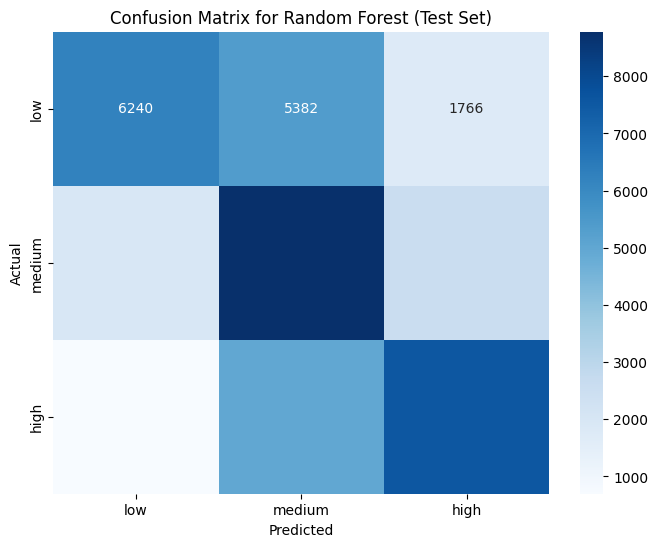

Random Forest Classification Report (Validation Set):
              precision    recall  f1-score   support

         low       0.71      0.47      0.57      6902
      medium       0.47      0.68      0.55      6906
        high       0.64      0.57      0.61      6964

    accuracy                           0.57     20772
   macro avg       0.61      0.57      0.57     20772
weighted avg       0.61      0.57      0.57     20772



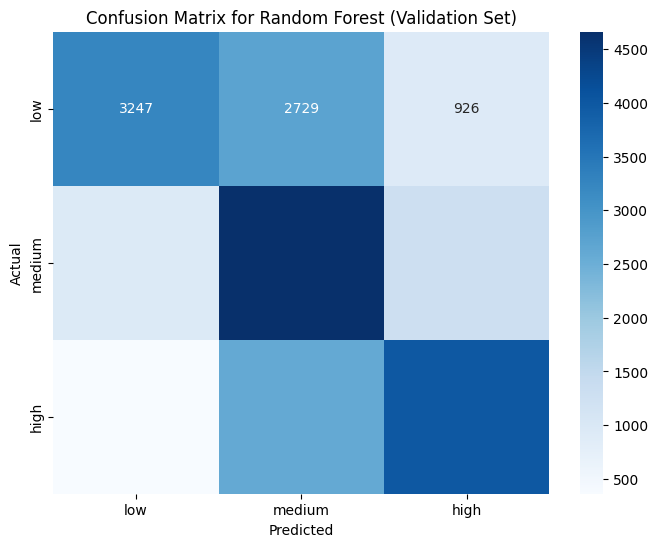

Review: "I really love this product! I tend to have issues with sunscreens feeling greasy on my face and making me look oily and shiny, but this spf fixed that issue. While I originally bought it to be my main sunscreen, I found it layers beautifully with the cream sunscreen I already had, which provides me with more security because I know It will actually protect me from the sun. The formula is very soft and it easily eliminates any shininess left behind by my cream sunscreen. It makes my face look great and I don’t find myself having sensory issues with my sunscreen anymore. I pair this with the hero brand sunscreen if anyone was wondering. Definitely try this out I totally recommend it"
Predicted Sentiment: high

Review: "The packaging is not functional!! I couldn’t use the product and had to throw it out since it was well past the return window. I wasted my money on this product, and I am super disappointed because I was actually looking forward to using it."
Predicted Sentiment: 

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the best parameters found from RandomizedSearchCV
best_params = random_search.best_params_

# Initialize the Random Forest model with the best parameters
random_forest_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    class_weight=best_params['class_weight'],
    random_state=42
)

# Train the Random Forest model with the best parameters
random_forest_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = random_forest_best.predict(X_test)

# Evaluate the Random Forest model on the test set
print("Random Forest Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test, target_names=['low', 'medium', 'high']))

# Compute and plot confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test, labels=[-1, 0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['low', 'medium', 'high'], 
            yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest (Test Set)')
plt.show()

# Make predictions on the validation set
y_pred_val = random_forest_best.predict(X_val)

# Evaluate the Random Forest model on the validation set
print("Random Forest Classification Report (Validation Set):")
print(classification_report(y_val, y_pred_val, target_names=['low', 'medium', 'high']))

# Compute and plot confusion matrix for the validation set
conf_matrix_val = confusion_matrix(y_val, y_pred_val, labels=[-1, 0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['low', 'medium', 'high'], 
            yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest (Validation Set)')
plt.show()

# Predict sentiment for sample reviews
# Sample reviews for prediction
sample_reviews_rand = [
    "I really love this product! I tend to have issues with sunscreens feeling greasy on my face and making me look oily and shiny, but this spf fixed that issue. While I originally bought it to be my main sunscreen, I found it layers beautifully with the cream sunscreen I already had, which provides me with more security because I know It will actually protect me from the sun. The formula is very soft and it easily eliminates any shininess left behind by my cream sunscreen. It makes my face look great and I don’t find myself having sensory issues with my sunscreen anymore. I pair this with the hero brand sunscreen if anyone was wondering. Definitely try this out I totally recommend it",
    "The packaging is not functional!! I couldn’t use the product and had to throw it out since it was well past the return window. I wasted my money on this product, and I am super disappointed because I was actually looking forward to using it.",
    "I’ve worked so hard to have clear skin for the past 2 years, and I take my spf game very seriously. I bought this thinking it would be my new go to when on the run or flying. I reapplied as the instructions said, making sure to blot before applying so that my pores wouldn’t get clogged. The way the product is distributed could be better but it’s a good product for when you’re on the run. But unfortunately, this product made my skin break out like I have never before.",
    "The powder itself is really nice and a great way to add spf throughout the day. The packaging leaves a lot to be desired. The brush doesn’t distribute well or evenly. It would be better as a separate brush and loose or pressed powder. I’d recommend buying the refills from the Supergoop website and filling your own pot."
]

# Transform the sample reviews using the same TF-IDF vectorizer
sample_reviews_rand_tfidf = tfidf_vectorizer.transform(sample_reviews_rand)

# Predict the sentiment of the sample reviews
sample_predictions_rand = random_forest_best.predict(sample_reviews_rand_tfidf)

# Map the numerical predictions to sentiment labels
sentiment_labels = { -1: 'low', 0: 'medium', 1: 'high' }
predicted_sentiments = [sentiment_labels[pred] for pred in sample_predictions_rand]

# Print the results for sample reviews
for review, sentiment in zip(sample_reviews_rand, predicted_sentiments):
    print(f"Review: \"{review}\"")
    print(f"Predicted Sentiment: {sentiment}")
    print()


From the results of the hyperparameter tuned models, the performance of the models were worse off than before tuning depsite trying out on the various permutations such as increasing the depth and number of iterations. 


# Product Recommendation System using Predicted Sentiment Level

In [99]:
# Assuming balanced_data is your DataFrame and tfidf_vectorizer is already fitted

# Transform the entire dataset
X_all = tfidf_vectorizer.transform(balanced_sentiment_data['lemmatized_text'])

# Predict sentiments for the entire dataset
y_pred_all = random_forest.predict(X_all)

# Map the numerical predictions to sentiment labels
sentiment_labels = { -1: 'low', 0: 'medium', 1: 'high' }
predicted_sentiments_all = [sentiment_labels[pred] for pred in y_pred_all]

# Add the predicted sentiments to the balanced_data DataFrame
balanced_sentiment_data['predicted_sentiment'] = predicted_sentiments_all

# Optionally, you can check the first few rows to verify
print(balanced_sentiment_data.head())


          author_id  rating  is_recommended  helpfulness  \
129583   8293066551       4             1.0     1.000000   
323833  10560129298       4             1.0     1.000000   
461181   1337562133       5             1.0     1.000000   
127739   6440324528       4             1.0     1.000000   
520644    853368994       5             1.0     0.789474   

                                           merged_reviews product_id  \
129583  What a great invention - Really enjoyed the me...    P421275   
323833                                No Reviews Provided    P440651   
461181  No more excess gunk! - This right here, is the...    P416816   
127739  A spot treatment that won’t stain your pillowc...    P421275   
520644  Loving this product to clear my skin - This wa...    P416815   

                                  product_name  loves_count sentiment_level  \
129583        Salicylic Acid Acne Healing Dots       316297            high   
323833   Mini Acne Control Clarifying Cleanser  

In [100]:
# Perform the groupby operation
# Aggregate multiple ratings for the same user-product pair by taking their mean
interactions = balanced_sentiment_data.groupby(['author_id', 'product_name', 'predicted_sentiment', 'sentiment_level'], as_index=False).agg({'rating': 'mean'})

# Define the mapping dictionary
sentiment_mapping = {
    'high': 1,
    'medium': 0,
    'low': -1
}

# Convert predicted_sentiment values to integers
interactions['predicted_sentiment'] = interactions['predicted_sentiment'].map(sentiment_mapping)

# Display the first 30 rows of the updated DataFrame
interactions.head(30)


author_id                                       product_name  \
0   10000117144                   Acne Control Clarifying Cleanser   
1   10000117144              Mini Acne Control Clarifying Cleanser   
2   10001502449                   Acne Control Clarifying Cleanser   
3   10001961830        Niacinamide 10% + Zinc 1% Oil Control Serum   
4    1000235057                           EradiKate Acne Treatment   
5    1000235057                   Salicylic Acid Acne Healing Dots   
6    1000284455                   Acne Control Clarifying Cleanser   
7    1000296322       Goodbye Acne  Max Complexion Correction Pads   
8   10003432083                   Salicylic Acid Acne Healing Dots   
9   10004122080                  Balancing Force Oil Control Toner   
10  10004127873  U.F.O. Salicylic Acid BHA Acne Treatment Face Oil   
11  10004128984  EradiKate Acne Mark Fading Gel with Salicylic ...   
12   1000416744                   Salicylic Acid Acne Healing Dots   
13  10005368592                   Rapid Relief Acne Spot Treatment   
14  10005368689  Skin Squad Pre + ProbioticSupplement for Acne-...   
15  10005488737                   Acne Clearing Skin Wash Cleanser   
16  10005488737  Acne+ 2% BHA and Azelaic Acid Acne Spot Treatment   
17  10005488737     Deep Relief Acne Treatment with Salicylic Acid   
18  10005524977                  Balancing Force Oil Control Toner   
19  10005524977             Find Your Balance Oil Control Cleanser   
20  10005943633                  Balancing Force Oil Control Toner   
21  10005943633             Find Your Balance Oil Control Cleanser   
22  10005985417                  Balancing Force Oil Control Toner   
23  10005985417             Find Your Balance Oil Control Cleanser   
24  10006368415                      Anti Bac Acne Clearing Lotion   
25  10006486800                  Balancing Force Oil Control Toner   
26  10006486800             Find Your Balance Oil Control Cleanser   
27  10006508738             Find Your Balance Oil Control Cleanser   
28  10006552426             Find Your Balance Oil Control Cleanser   
29  10007009256                  Balancing Force Oil Control Toner   

    predicted_sentiment sentiment_level  rating  
0                     1            high     5.0  
1                     1            high     5.0  
2                     1            high     5.0  
3                     1            high     5.0  
4                     1            high     5.0  
5                     1            high     5.0  
6                     1            high     5.0  
7                     1            high     4.0  
8                     0             low     2.0  
9                    -1             low     2.0  
10                    1            high     5.0  
11                   -1             low     1.0  
12                    1            high     4.0  
13                    0          medium     3.0  
14                    1            high     5.0  
15                    1            high     5.0  
16                    1            high     4.0  
17                    1            high     4.0  
18                    0            high     5.0  
19                    1            high     5.0  
20                    1            high     4.0  
21                    1            high     5.0  
22                    1            high     5.0  
23                    1            high     4.0  
24                    1            high     5.0  
25                    1            high     5.0  
26                    1            high     5.0  
27                    1            high     5.0  
28                    1            high     4.0  
29                    1            high     5.0

In [101]:
# Aggregate duplicate entries by taking the mean of predicted_sentiment
interactions_agg = interactions.groupby(['author_id', 'product_name'], as_index=False).agg({'predicted_sentiment': 'mean'})


# Pivot the data to create a user-item matrix
user_item_matrix_pred = interactions_agg.pivot(index='author_id', columns='product_name', values='predicted_sentiment')

# Fill NaN values with 0 or any other appropriate method
user_item_matrix_pred = user_item_matrix_pred.fillna(0)

# Display the resulting matrix
user_item_matrix_pred.head()


product_name  10% Benzoyl Peroxide Acne Cleanser  \
author_id                                          
10000117144                                  0.0   
10001502449                                  0.0   
10001961830                                  0.0   
1000235057                                   0.0   
1000284455                                   0.0   

product_name  10% Glycolic Acne Control Peel Pads  \
author_id                                           
10000117144                                   0.0   
10001502449                                   0.0   
10001961830                                   0.0   
1000235057                                    0.0   
1000284455                                    0.0   

product_name  Acne Away Kit + Salicylic Acid + Azelaic Acid + Niacinamide  \
author_id                                                                   
10000117144                                                 0.0             
10001502449                                                 0.0             
10001961830                                                 0.0             
1000235057                                                  0.0             
1000284455                                                  0.0             

product_name  Acne Clearing Skin Wash Cleanser  Acne Clearing Wash  \
author_id                                                            
10000117144                                0.0                 0.0   
10001502449                                0.0                 0.0   
10001961830                                0.0                 0.0   
1000235057                                 0.0                 0.0   
1000284455                                 0.0                 0.0   

product_name  Acne Control 30-Day Trial Kit for Clearer Skin  \
author_id                                                      
10000117144                                              0.0   
10001502449                                              0.0   
10001961830                                              0.0   
1000235057                                               0.0   
1000284455                                               0.0   

product_name  Acne Control Clarifying Body Spray  \
author_id                                          
10000117144                                  0.0   
10001502449                                  0.0   
10001961830                                  0.0   
1000235057                                   0.0   
1000284455                                   0.0   

product_name  Acne Control Clarifying Cleanser  \
author_id                                        
10000117144                                1.0   
10001502449                                1.0   
10001961830                                0.0   
1000235057                                 0.0   
1000284455                                 1.0   

product_name  Acne Control Clarifying Cream Cleanser  Acne Facial Cleanser  \
author_id                                                                    
10000117144                                      0.0                   0.0   
10001502449                                      0.0                   0.0   
10001961830                                      0.0                   0.0   
1000235057                                       0.0                   0.0   
1000284455                                       0.0                   0.0   

product_name  ...  Salicylic Acid Acne Treatment Serum  \
author_id     ...                                        
10000117144   ...                                  0.0   
10001502449   ...                                  0.0   
10001961830   ...                                  0.0   
1000235057    ...                                  0.0   
1000284455    ...                                  0.0   

product_name  Saturn Sulfur + Niacinamide Spot Treatment Mask  \
author_id                                       

In [102]:
# Sample a subset of users (e.g.,30% of users)
sampled_users = user_item_matrix_pred.sample(frac=1, random_state=42)
user_item_matrix_pred_sampled = sampled_users.copy()

# Compute the cosine similarity matrix for the sampled data
user_user_sim_matrix_pred_sampled = pd.DataFrame(
    cosine_similarity(user_item_matrix_pred_sampled),
    index=user_item_matrix_pred_sampled.index,
    columns=user_item_matrix_pred_sampled.index
)

# Display the similarity matrix for sampled data
print("User-User Similarity Matrix (Sampled):")
user_user_sim_matrix_pred_sampled.head(10)


User-User Similarity Matrix (Sampled):


author_id    22443975490  8451629523  5990365487  22358420165  6174010053  \
author_id                                                                   
22443975490          1.0         0.0         0.0         -1.0         0.0   
8451629523           0.0         1.0         0.0          0.0         0.0   
5990365487           0.0         0.0         1.0          0.0         0.0   
22358420165         -1.0         0.0         0.0          1.0         0.0   
6174010053           0.0         0.0         0.0          0.0         1.0   
1917933057           0.0         0.0         0.0          0.0         0.0   
7766442628           0.0         0.0         0.0          0.0         0.0   
6431874601           0.0         0.0         0.0          0.0         0.0   
6184232016           0.0         0.0         0.0          0.0         0.0   
5203239820           0.0         0.0         0.0          0.0         0.0   

author_id    1917933057  7766442628  6431874601  6184232016  5203239820  ...  \
author_id                                                                ...   
22443975490         0.0         0.0         0.0         0.0         0.0  ...   
8451629523          0.0         0.0         0.0         0.0         0.0  ...   
5990365487          0.0         0.0         0.0         0.0         0.0  ...   
22358420165         0.0         0.0         0.0         0.0         0.0  ...   
6174010053          0.0         0.0         0.0         0.0         0.0  ...   
1917933057          1.0         0.0         0.0         0.0         0.0  ...   
7766442628          0.0         1.0         0.0         0.0         0.0  ...   
6431874601          0.0         0.0         1.0         0.0         0.0  ...   
6184232016          0.0         0.0         0.0         0.0         0.0  ...   
5203239820          0.0         0.0         0.0         0.0         1.0  ...   

author_id    11520942571  10421835253  1104357539  2514942483  5349160674  \
author_id                                                                   
22443975490          0.0         -1.0         0.0         0.0         0.0   
8451629523           0.0          0.0         0.0         0.0         0.0   
5990365487           0.0          0.0         0.0         0.0         0.0   
22358420165          0.0          1.0         0.0         0.0         0.0   
6174010053           0.0          0.0         0.0         0.0         0.0   
1917933057           0.0          0.0         0.0         0.0         0.0   
7766442628           0.0          0.0         0.0         0.0         0.0   
6431874601           0.0          0.0         0.0         0.0         0.0   
6184232016           0.0          0.0         0.0         0.0         0.0   
5203239820           0.0          0.0         0.0         0.0         0.0   

author_id    25949606165  1418362543  2057141620  10483481649  24913270667  
author_id                                                                   
22443975490          0.0         0.0         0.0          0.0          0.0  
8451629523           0.0         0.0         0.0          0.0          0.0  
5990365487           0.0         0.0         0.0          0.0          0.0  
22358420165          0.0         0.0         0.0          0.0          0.0  
6174010053           0.0         0.0         0.0          0.0          0.0  
1917933057           0.0         0.0         0.0          0.0          0.0  
7766442628           0.0         0.0         0.0          0.0          0.0  
6431874601           0.0         0.0         0.0          0.0          0.0  
6184232016           0.0         0.0         0.0          0.0          0.0  
5203239820           0.0         0.0         0.0          0.0          0.0  

[10 rows x 33743 columns]

From the above user-user similarity matrix, we can see that customer 22358420165 and 22443975490 signifies strong dissimilarity or negative similarity. We will cross check the products recommended to these 2 customers will not coincide.

In [103]:
def recommend_products_with_sentiment(user_id, user_item_matrix, user_user_sim_matrix, num_recommendations=10):
    if user_id not in user_item_matrix.index:
        print(f"User ID {user_id} not found in user_item_matrix.")
        return None

    # Get similar users
    similar_users = user_user_sim_matrix.loc[user_id].sort_values(ascending=False)

    # Initialize a dictionary to hold the product scores
    product_scores = {}

    # Loop through similar users
    for similar_user in similar_users.index:
        if similar_user == user_id:
            continue  # Skip the user itself

        # Get the ratings of the similar user
        similar_user_ratings = user_item_matrix.loc[similar_user]

        # Calculate scores for each product
        for product, sentiment_score in similar_user_ratings.items():
            if sentiment_score > 0 and user_item_matrix.loc[user_id, product] == 0:
                # If the user hasn't rated this product
                if product not in product_scores:
                    product_scores[product] = 0
                # Update the product score based on the similarity and sentiment score
                product_scores[product] += similar_users[similar_user] * sentiment_score

    # Sort products by score
    recommended_products = sorted(product_scores.items(), key=lambda x: x[1], reverse=True)

    return [product for product, score in recommended_products[:num_recommendations]]

# Example usage:
# 2859064959
# 1000284455
user_id = '1417526373'  # Replace with your actual user ID
recommendations = recommend_products_with_sentiment(user_id, user_item_matrix_pred, user_user_sim_matrix)
print(f"Recommended products for user {user_id}:")
print(recommendations)


Recommended products for user 1417526373:
['Mini Acne Control Clarifying Cleanser', 'Salicylic Acid Acne Healing Dots', 'Anti Bac Acne Clearing Lotion', 'EradiKate Daily Cleanser Acne Treatment', 'Goodbye Acne  Max Complexion Correction Pads', 'Therapeutic Sulfur Acne Treatment Mask', 'Acne Control Clarifying Cleanser', 'Acne Solutions Clarifying Lotion', 'Super Spot Remover Acne Treatment Gel', 'U.F.O. Salicylic Acid BHA Acne Treatment Face Oil']


In [104]:
def recommend_products_with_high_sentiment(user_id, user_item_matrix, user_user_sim_matrix, num_recommendations=10):
    if user_id not in user_item_matrix.index:
        print(f"User ID {user_id} not found in user_item_matrix.")
        return None

    # Get similar users
    similar_users = user_user_sim_matrix.loc[user_id].sort_values(ascending=False)

    # Initialize a dictionary to hold the product scores
    product_scores = {}

    # Loop through similar users
    for similar_user in similar_users.index:
        if similar_user == user_id:
            continue  # Skip the user itself

        # Get the ratings of the similar user
        similar_user_ratings = user_item_matrix.loc[similar_user]

        # Calculate scores for each product
        for product, sentiment_score in similar_user_ratings.items():
            # Only consider products with high sentiment level and which the user hasn't rated
            if sentiment_score == 1 and user_item_matrix.loc[user_id, product] == 0:
                if product not in product_scores:
                    product_scores[product] = 0
                # Update the product score based on the similarity and sentiment score
                product_scores[product] += similar_users[similar_user] * sentiment_score

    # Sort products by score
    recommended_products = sorted(product_scores.items(), key=lambda x: x[1], reverse=True)

    return [product for product, score in recommended_products[:num_recommendations]]


In [105]:
user_id = '22443975490'  # Replace with your actual user ID
recommendations = recommend_products_with_high_sentiment(user_id, user_item_matrix_pred, user_user_sim_matrix_pred_sampled)
print(f"Recommended products for user {user_id} with high sentiment:")
print(recommendations)


Recommended products for user 22443975490 with high sentiment:
['Salicylic Acid Acne Healing Dots', 'Salicylic Acid Acne + Pore Cleanser', 'Succinic Acid Acne Treatment', 'Balancing Force Oil Control Toner', 'Beta Hydroxy Acid (BHA) Blemish + Blackhead Serum', 'Rapid Relief Acne Spot Treatment', 'Mini Lapis Blue Tansy Face Oil - For Oily & Acne-Prone Skin', 'Niacinamide Oil Control Serum', 'EradiKate Acne Treatment', 'Lapis Blue Tansy Face Oil - For Oily & Acne-Prone Skin']


In [106]:
user_id = '22358420165'  # Replace with your actual user ID
recommendations = recommend_products_with_high_sentiment(user_id, user_item_matrix_pred, user_user_sim_matrix_pred_sampled)
print(f"Recommended products for user {user_id} with high sentiment:")
print(recommendations)


Recommended products for user 22358420165 with high sentiment:
['Daily Cleanse Clear Skin and Body Detox Supplement', 'Goodbye Acne AHA/BHA Acne Clearing Gel Face Body Spot Treatment', 'Mini Goodbye Acne  AHA/BHA Acne Clearing Gel Face Body Spot Treatment', 'Acne Solutions All-Over Clearing Treatment Oil-Free', 'Acne Clearing Skin Wash Cleanser', 'Acne+ 2% BHA and Azelaic Acid Acne Spot Treatment', 'Goodbye Acne   Complete Acne Treatment Gel', '10% Glycolic Acne Control Peel Pads', 'Acne Facial Cleanser', 'Salicylic Acid Acne Day Dots']


# Conclusion:
From the analysis gathered, we can conclude that both ratings and sentiments are effective on product recommendation to other customers. However, the customer's purchase decision can be influenced by several reasons, these include:

1. Customer prioritizing functional attributes of the products over emotional sentiment. For instance, if the products meet specific needs or solve a problem, the practical benefits may outweight emotional sentiment and ratings. 

2. Price can be a decisive factor in purchasing decisions. If a customer is price-sensitive, they may choose lower-cost alternative. 

3. High Market Saturation where customer has numerous options, sentiment may be diluted. Customers may focus more on differentiation factors like features, quality or convenience that meet their needs.   

4. Sentiment is inherently subjective,reflecting personal perspectives and feelings rather than objective truths. 

5. External factor such as economic conditions, social trend can impact purchasing decision. For example, during economic downturn customers may prioritize affordability over sentiment.  

Therefore, the hypothesis on customers more likely to purchase products recommended based on product ratings and positive sentiments is suppotive to a certain extent. Further in-depth analysis is required to identify the key factors that drive purchasing decisions and better understand the underlying influences on customer behaviour. This would allow Sephora to strategically tailor its marketing efforts, enhance product recommendations, and optimize customer engagement by focusing on the most impactful elements that genuinely influence buying choices.  